# Video Game Sales Analysis

## Introduction
The Video Game Sales Analysis Project focuses on examining historical video game sales data to uncover trends and patterns that drive game success. This analysis aims to provide actionable insights for planning future advertising campaigns and identifying potential high-performing games.

***Project Goal***
The primary goal of this project is to analyze sales data from 2016 to forecast trends for 2017. By evaluating factors such as platform popularity, genre preferences, regional sales patterns, and the influence of reviews, the project will help guide marketing strategies and decision-making.

***Main Steps***
1. Data Preparation
    - Clean and preprocess the dataset, including handling missing values, standardizing column names, and creating new metrics like total sales.
2. Exploratory Data Analysis (EDA)
    - Investigate sales trends across platforms, genres, and regions.
    - Analyze the impact of user and critic reviews on game performance.
3. Regional User Profiles
    - Identify top platforms and genres for North America, Europe, and Japan.
    - Examine variations in regional preferences and the role of ESRB ratings.
4. Hypothesis Testing
    - Conduct statistical tests to compare user ratings across platforms and genres.
5. Conclusions and Recommendations
    - Summarize findings and provide actionable insights to drive advertising and strategy decisions.

## The Data:

- Name - video game name
- Platform - video game platform
- Year_of_Release - realease year (1980-2016)
- Genre - video game genre
- NA_sales - North American sales in USD million
- EU_sales - European sales in USD million
- JP_sales - Japanaese sales in USD million
- Other_sales - Sales from regions other than the above three in USD million
- Critic_Score - score given by critic (maximum of 100) 
- User_Score - score given by users (maximum of 10) 
- Rating - video game rating (Entertainment Software Rating Board (ESRB) evaluates a game's content and assigns an age rating)


Data for 2016 may be incomplete.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy import stats as st
from IPython.display import display

In [2]:
games_df = pd.read_csv('/datasets/games.csv')

In [3]:
def update(data_frame):
    data_frame.info()
    display(data_frame.head())

In [4]:
update(games_df)
games_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
# Create a mask to check for 'tbd' values in each column
tbd_mask = games_df.apply(lambda x: x.astype(str).str.contains('tbd', na=False)).any()

# Display columns with 'tbd' values
print("\nColumns with 'tbd' values:")
print(tbd_mask[tbd_mask].index.tolist())


Columns with 'tbd' values:
['User_Score']


## Intial data cleaning and setup:

1. Change column names to make them lowercase
2. Look for duplicated rows
3. Convert the data to the required types
    - Describe the columns where the data types have been changed and why.
    - Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
4. If necessary, decide how to deal with missing values:
    - Explain why you filled in the missing values as you did or why you decided to leave them blank.
    - Why do you think the values are missing? Give possible reasons.
5. Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.
6. Look at 2016 data for accuracy

### Lowercase Column Names

In [6]:
#cycling through all column names using lambda and changing them to all lower case
games_df = games_df.rename(columns=lambda x: x.lower())

### Duplicated Rows

In [7]:
# checking for full line duplicatation
display(games_df.duplicated().sum())

# checking for duplicated game names
display(games_df['name'].value_counts())

# checking for game and platform duplication 
display(games_df.duplicated(subset=['name','platform']).sum())

# Find specific duplicated rows based on 'name' and 'platform'
duplicated_rows = games_df[games_df.duplicated(subset=['name', 'platform'], keep=False)]
# Display the duplicated rows
display(duplicated_rows)

0

Need for Speed: Most Wanted              12
FIFA 14                                   9
LEGO Marvel Super Heroes                  9
Madden NFL 07                             9
Ratatouille                               9
                                         ..
V-Rally Edition 99                        1
Jikkyou Powerful Pro Yakyuu Next          1
Doraemon: Shin Nobita no Nihon Tanjou     1
N3: Ninety-Nine Nights                    1
Twisted Edge Extreme Snowboarding         1
Name: name, Length: 11559, dtype: int64

5

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


***Initial duplication take aways:***
- there are no fully duplicated rows
- the same game was released on multiple different platfroms.
- there are 5 game and platform combinations that are duplicated. 
    - NaN on GEN 
        - taking these two rows out of data because it is impossible to determine the game name
    - Madden NFL 13 on PS3
        - adding sales for the duplicated row. small amount of sales
    - Sonic th Hedgehog on PS3 
        - based on the other releases of this game and the unknown release year of one of the rows, the two lines will be added together to get the total sales for the different regions
    - Need for Speed: Most Wanted on X360 & Need for Speed: Most wanted on PC 
        - there are two release years for the same game/platform. Assumed updated game and re-release
        - due to small data size effexted will add sale data together and keep earlest release date
    

In [8]:
#Single line of code found later on in data analysis that is incorrect. Found correct year of release online and changed
display(games_df[(games_df['year_of_release']<= 2003) & (games_df['platform']=='DS')])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15957,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN


In [9]:
# looking into the other games release in 1993 on GEN
games_df[(games_df['platform']=='GEN') & (games_df['year_of_release']==1993)]

# dropping the two rows with NaN in the game name
games_df = games_df.dropna(subset = ['name'])

In [10]:
# looking at the 3 games that have duplications and 
# determining reason for duplication based on data of the game on different platforms
display(games_df[games_df['name'] == 'Madden NFL 13'])
display(games_df[games_df['name'] == 'Need for Speed: Most Wanted'])
display(games_df[games_df['name'] == 'Sonic the Hedgehog'])

# Combine sales for "Madden NFL 13" on PS3
madden_mask = (games_df['name'] == 'Madden NFL 13') & (games_df['platform'] == 'PS3')
madden_combined = games_df[madden_mask].groupby(['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']).sum().reset_index()
games_df = games_df[~madden_mask].append(madden_combined, ignore_index=True)

# Combine sales for "Sonic the Hedgehog" on PS3
sonic_mask = (games_df['name'] == 'Sonic the Hedgehog') & (games_df['platform'] == 'PS3')
sonic_combined = games_df[sonic_mask].groupby(['name', 'platform', 'genre', 'critic_score', 'user_score', 'rating']).sum().reset_index()
sonic_combined['year_of_release'] = 2006.0  # Assuming the release year as 2006
games_df = games_df[~sonic_mask].append(sonic_combined, ignore_index=True)

# Combine sales for "Need for Speed: Most Wanted" on X360 and PC
nfs_mask = (games_df['name'] == 'Need for Speed: Most Wanted') & (games_df['platform'].isin(['X360', 'PC']))
nfs_combined = games_df[nfs_mask].groupby(['name', 'platform', 'genre', 'critic_score', 'user_score', 'rating']).sum().reset_index()
nfs_combined['year_of_release'] = nfs_combined.apply(lambda x: games_df[(games_df['name'] == x['name']) & (games_df['platform'] == x['platform'])]['year_of_release'].min(), axis=1)
games_df = games_df[~nfs_mask].append(nfs_combined, ignore_index=True)

# Find specific duplicated rows based on 'name' and 'platform'
duplicated_rows = games_df[games_df.duplicated(subset=['name', 'platform'], keep=False)]
# Checking no duplicated frows
display(duplicated_rows)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
257,Sonic the Hedgehog,GEN,1991.0,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
1996,Sonic the Hedgehog,X360,2006.0,Platform,0.44,0.48,0.00,0.11,46.0,4.4,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### Converting Data Types and TBD values

In [11]:
update(games_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16709 entries, 0 to 16708
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16709 non-null  object 
 1   platform         16709 non-null  object 
 2   year_of_release  16441 non-null  float64
 3   genre            16709 non-null  object 
 4   na_sales         16709 non-null  float64
 5   eu_sales         16709 non-null  float64
 6   jp_sales         16709 non-null  float64
 7   other_sales      16709 non-null  float64
 8   critic_score     8133 non-null   float64
 9   user_score       10010 non-null  object 
 10  rating           9945 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


***Changes needed:***
- name to string
    - changed name from object to string to improve code clarity and consistency when working with textual data.
- platform to string
    - changed name from object to string to improve code clarity and consistency when working with textual data.
- year_of_relase to integer
    - none of these should be float values, to improve codeclarity and consistency
- genre to string
    - changed name from object to string to improve code clarity and consistency when working with textual data.
- user_score to float
    - user_score should be NaN or a float value(after looking into the tbd values below)
- check tbd in user_score
    - all tbd values in user_score are in 1970. Since this is far in the past these values will be changed to NaN. The assumption is, the scores would already be in the data set from games that long ago.
- rating to string
    - changed name from object to string to improve code clarity and consistency when working with textual data.

In [12]:
#Convert 'name' column to string
games_df['name'] = games_df['name'].astype('string')

#Convert 'platform' column to string
games_df['platform'] = games_df['platform'].astype('string')

# Convert 'year_of_release' to integer, coercing errors to NaN
games_df['year_of_release'] = pd.to_numeric(games_df['year_of_release'], errors='coerce').astype('Int64')

#Convert 'genre' column to string
games_df['genre'] = games_df['genre'].astype('string')

In [13]:
# looking at where the tbd values in user score are coming from
games_df[games_df['user_score']=='tbd'].describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,2376.000000,2424.000000,2424.000000,2424.000000,2424.000000,1082.000000
mean,2007.450337,0.126052,0.043519,0.002727,0.015862,60.711645
std,3.484229,0.180586,0.111412,0.026136,0.039156,11.193035
min,1997.000000,0.000000,0.000000,0.000000,0.000000,23.000000
25%,2005.000000,0.030000,0.000000,0.000000,0.000000,54.000000
50%,2008.000000,0.075000,0.010000,0.000000,0.010000,62.000000
75%,2010.000000,0.150000,0.040000,0.000000,0.020000,69.000000
max,2016.000000,3.450000,2.590000,0.860000,1.090000,90.000000


In [14]:
# Convert 'user_score' column to float, handling 'tbd' and NaN values
games_df['user_score'] = pd.to_numeric(games_df['user_score'], errors='coerce')

#Convert 'rating' column to string
games_df['rating'] = games_df['rating'].astype('string')

In [15]:
update(games_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16709 entries, 0 to 16708
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16709 non-null  string 
 1   platform         16709 non-null  string 
 2   year_of_release  16441 non-null  Int64  
 3   genre            16709 non-null  string 
 4   na_sales         16709 non-null  float64
 5   eu_sales         16709 non-null  float64
 6   jp_sales         16709 non-null  float64
 7   other_sales      16709 non-null  float64
 8   critic_score     8133 non-null   float64
 9   user_score       7586 non-null   float64
 10  rating           9945 non-null   string 
dtypes: Int64(1), float64(6), string(4)
memory usage: 1.4 MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,<NA>
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,<NA>


### Missing Values

Columns with missing values:
- year_of_release(268 NaN)
    - some of these games were released on different platforms. If all of the release dates where the same it was changed, otherwise it was left as NaN
    - Reduced NaN to 157
- critic_score(8576 NaN)
    - this will be left as NaN, due to the amount of data and how it could skew further analysis if a value was added
- user_score(9123 NaN)
    - this will be left as NaN, due to the amount of data and how it could skew further analysis if a value was added
- rating(6764 NaN)
    - this will be left as NaN, due to the amount of data and how it could skew further analysis if a value was added

In [16]:
display(games_df[games_df['year_of_release'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,<NA>
608,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,<NA>
...,...,...,...,...,...,...,...,...,...,...,...
16363,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16395,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16438,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16448,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,<NA>


In [17]:
display(games_df[games_df['name']=='LEGO Batman: The Videogame'])
display(games_df[games_df['name']=='PDC World Championship Darts 2008'])
display(games_df[games_df['name']=='Virtua Quest'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008,Action,1.75,1.01,0.0,0.29,72.0,8.0,E10+
1516,LEGO Batman: The Videogame,PS3,2008,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1535,LEGO Batman: The Videogame,PSP,<NA>,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1550,LEGO Batman: The Videogame,PS2,2008,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12457,LEGO Batman: The Videogame,PC,2008,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6910,PDC World Championship Darts 2008,Wii,2008,Sports,0.02,0.21,0.0,0.01,51.0,5.4,E10+
15944,PDC World Championship Darts 2008,DS,<NA>,Sports,0.01,0.00,0.0,0.00,NaN,NaN,<NA>
16363,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.0,0.00,43.0,NaN,E10+


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15745,Virtua Quest,PS2,<NA>,Role-Playing,0.01,0.01,0.0,0.0,53.0,7.6,T
16512,Virtua Quest,GC,<NA>,Role-Playing,0.01,0.00,0.0,0.0,55.0,5.5,T


In [18]:
# Step 1: Identify rows with missing year_of_release
missing_years = games_df[games_df['year_of_release'].isna()]

# Step 2: Group by 'name' to identify platforms with missing years
grouped_missing_years = missing_years.groupby('name')

for name, group in grouped_missing_years:
    # Get all unique release years for a game name, excluding NaN values
    all_years = games_df[games_df['name'] == name]['year_of_release'].dropna().unique()
    
    # Check if we have exactly one unique release year for the given game name
    if len(all_years) == 1:
        common_year = all_years[0]
        # Fill NaN values in the original DataFrame with the common year
        games_df.loc[(games_df['name'] == name) & (games_df['year_of_release'].isna()), 'year_of_release'] = common_year

# Verify the changes
display(games_df[games_df['name'] == 'Madden NFL 2004'])
display(games_df[games_df['year_of_release'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,2003,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1876,Madden NFL 2004,XB,2003,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3884,Madden NFL 2004,GC,2003,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5702,Madden NFL 2004,GBA,2003,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,<NA>
608,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,<NA>
626,Rock Band,X360,<NA>,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
656,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
803,Rock Band,Wii,<NA>,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
...,...,...,...,...,...,...,...,...,...,...,...
16267,Homeworld Remastered Collection,PC,<NA>,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16278,Shorts,DS,<NA>,Platform,0.01,0.00,0.00,0.00,NaN,NaN,E10+
16338,Agarest Senki: Re-appearance,PS3,<NA>,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,<NA>
16448,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,<NA>


### Total Sales

In [20]:
# Summing the sales columns row-wise to calculate the total sales
games_df['total_sales'] = games_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [21]:
update(games_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16709 entries, 0 to 16708
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16709 non-null  string 
 1   platform         16709 non-null  string 
 2   year_of_release  16552 non-null  Int64  
 3   genre            16709 non-null  string 
 4   na_sales         16709 non-null  float64
 5   eu_sales         16709 non-null  float64
 6   jp_sales         16709 non-null  float64
 7   other_sales      16709 non-null  float64
 8   critic_score     8133 non-null   float64
 9   user_score       7586 non-null   float64
 10  rating           9945 non-null   string 
 11  total_sales      16709 non-null  float64
dtypes: Int64(1), float64(7), string(4)
memory usage: 1.5 MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,<NA>,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,<NA>,31.38


### 2016 data

The 2016 data has missing critic and users scores and is missing ratings. Though this is no larger of a percentager of missing values as compared to the data as a whole.

In [22]:
games_df[games_df['year_of_release']==2016].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 94 to 16704
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             502 non-null    string 
 1   platform         502 non-null    string 
 2   year_of_release  502 non-null    Int64  
 3   genre            502 non-null    string 
 4   na_sales         502 non-null    float64
 5   eu_sales         502 non-null    float64
 6   jp_sales         502 non-null    float64
 7   other_sales      502 non-null    float64
 8   critic_score     232 non-null    float64
 9   user_score       262 non-null    float64
 10  rating           280 non-null    string 
 11  total_sales      502 non-null    float64
dtypes: Int64(1), float64(7), string(4)
memory usage: 51.5 KB


## Data Analysis

1. Look at how many games were released in different years. Is the data for every period significant?
2. Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?
3. Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a model for 2017.
4. Work only with the data that you've decided is relevant. Disregard the data for previous years.
5. Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.
6. Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.
7. Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
8. Keeping your conclusions in mind, compare the sales of the same games on other platforms.
9. Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

### Games Relased by Year

In [23]:
# Clean the DataFrame by dropping rows with missing 'year_of_release'
cleaned_games_df = games_df.dropna(subset=['year_of_release'])

# Convert 'year_of_release' to integer to avoid issues
cleaned_games_df['year_of_release'] = cleaned_games_df['year_of_release'].astype(int)

# Group by 'year_of_release' and count the number of games released each year
yearly_releases = cleaned_games_df['year_of_release'].value_counts().sort_index()

display(yearly_releases)

/tmp/ipykernel_50/1539280546.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_games_df['year_of_release'] = cleaned_games_df['year_of_release'].astype(int)


1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     339
2000     350
2001     484
2002     842
2003     783
2004     764
2005     947
2006    1018
2007    1202
2008    1440
2009    1430
2010    1269
2011    1153
2012     659
2013     547
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

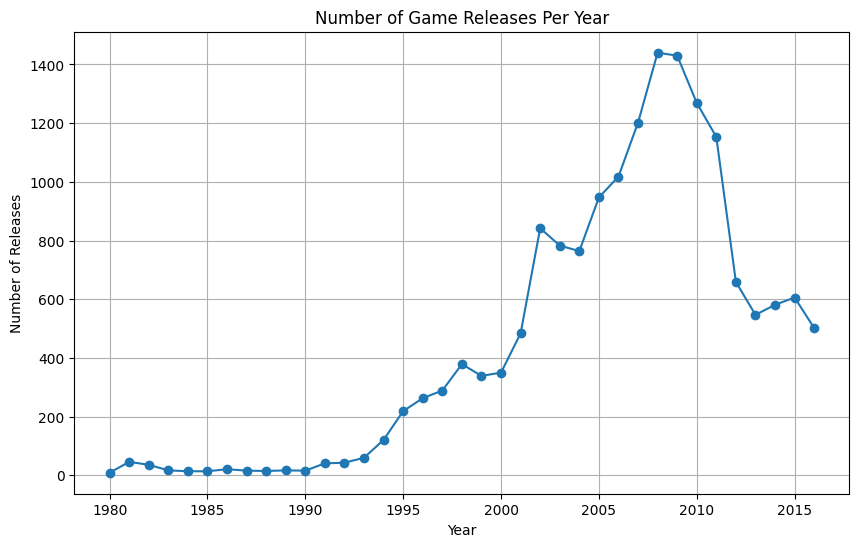

In [24]:
# Plot the distribution of game releases over the years
plt.figure(figsize=(10, 6))
plt.plot(yearly_releases.index, yearly_releases.values, marker='o')
plt.title('Number of Game Releases Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()


In [25]:
games_sales = games_df.groupby('year_of_release').agg({'name':'count'})
games_sales = games_sales.rename(columns = {'name':'Number of games sold'}, level=0)
games_sales.index = games_sales.index.rename('year')
games_sales

,Number of games sold
year,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


<div class="alert alert-info"> Need to fix this chart.  </div>

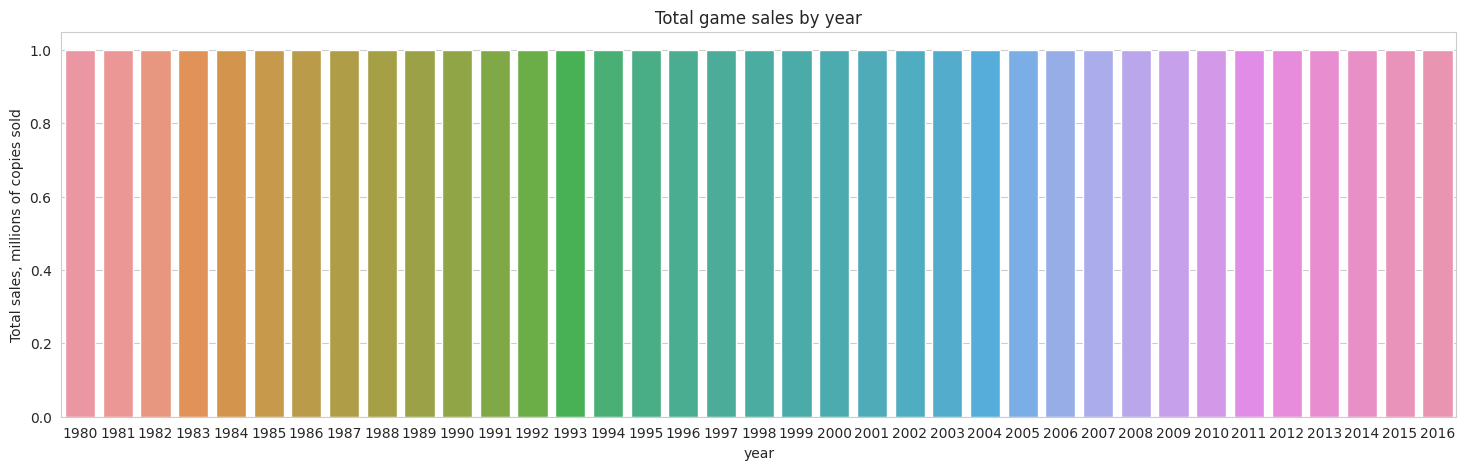

In [26]:
games_sales = games_df.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()

sns.set_style('whitegrid')
plt.figure(figsize=(18,5))
sns.countplot(data=games_sales,x='year_of_release');
plt.title('Total game sales by year')
plt.ylabel('Total sales, millions of copies sold')
plt.xlabel('year');
#plt.xlim(1994, 2016)  # Set the limits of the x-axis


<div class="alert alert-block alert-warning">📝

__Reviewer's comment №1__
    

It would be nice to add visualizations. In order to build a graph, you need to group the data (in our case, the year of release and quantity)
    
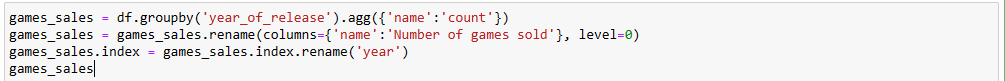
    
---
Next, using the sns library (it's powerful, and you can do anything with it). From the data in the grouped table, plot the graph. You can have it if you want =) The main thing is to play around with the arguments and figure it out. In future projects you will build powerful graphs, this skill will come in handy there    
    
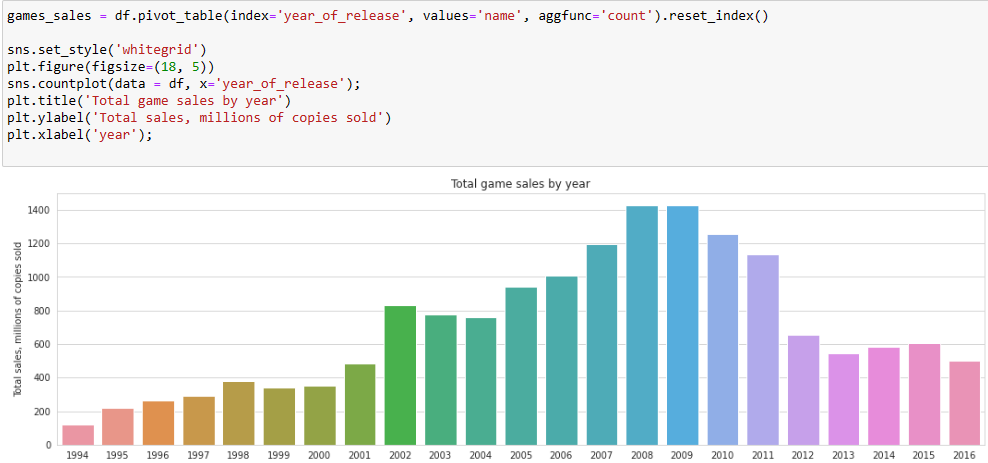
</div>

The data prior to 1994 could be considered less significant than the rest of the data simply due to the limited number of games released during this year. Additionally, data from 2016 is accurate however some of this data might be missing. Due to these facts and the purpose of the project in making a campaign for 2017, the data analysis will focus on data from 1994 to 2015. However, 2016 data will be looked at in cases when the quantity of data points won't effect the results.

In [27]:
#seperating the data into post 1994 and pre 1994
post_1994_df = games_df[games_df['year_of_release']>=1994]
pre_1994_df = games_df[games_df['year_of_release']<=1993]

pre_1994_df.describe()
post_1994_df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16187.000000,16187.000000,16187.000000,16187.000000,16187.000000,8062.000000,7529.00000,16187.000000
mean,2006.921048,0.249933,0.145478,0.068320,0.047925,68.991317,7.12590,0.511656
std,5.129890,0.714115,0.506990,0.281354,0.188900,13.920617,1.49717,1.466913
min,1994.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.00000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.40000,0.060000
50%,2008.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.50000,0.160000
75%,2011.000000,0.230000,0.110000,0.030000,0.030000,79.000000,8.20000,0.450000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.70000,82.540000


### Sales by platform

Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

In [28]:
update(games_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16709 entries, 0 to 16708
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16709 non-null  string 
 1   platform         16709 non-null  string 
 2   year_of_release  16552 non-null  Int64  
 3   genre            16709 non-null  string 
 4   na_sales         16709 non-null  float64
 5   eu_sales         16709 non-null  float64
 6   jp_sales         16709 non-null  float64
 7   other_sales      16709 non-null  float64
 8   critic_score     8133 non-null   float64
 9   user_score       7586 non-null   float64
 10  rating           9945 non-null   string 
 11  total_sales      16709 non-null  float64
dtypes: Int64(1), float64(7), string(4)
memory usage: 1.5 MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,<NA>,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,<NA>,31.38


In [29]:
#finding all unique platforms
platforms = post_1994_df['platform'].unique()
display(platforms)

<StringArray>
[ 'Wii',   'GB',   'DS', 'X360',  'PS3',  'PS2',  'GBA',  'PS4',  '3DS',
  'N64',   'PS', 'SNES',   'XB',   'PC',  'PSP', 'XOne', 'WiiU',   'GC',
   'DC',  'PSV',  'SAT',  'GEN',   'WS',   'NG',  'SCD', 'TG16',  'NES',
  '3DO', 'PCFX']
Length: 29, dtype: string

In [30]:
platform_sales ={}
for x in platforms:
    total_sale = post_1994_df[post_1994_df['platform']==x]['total_sales'].sum()
    platform_sales[x] = total_sale

In [31]:
display(platform_sales)

{'Wii': 903.31,
 'GB': 152.07999999999998,
 'DS': 804.26,
 'X360': 966.61,
 'PS3': 935.19,
 'PS2': 1245.96,
 'GBA': 313.73,
 'PS4': 314.14,
 '3DS': 258.51000000000005,
 'N64': 218.47999999999996,
 'PS': 727.58,
 'SNES': 84.67000000000002,
 'XB': 254.49000000000004,
 'PC': 255.41000000000003,
 'PSP': 292.77,
 'XOne': 159.32,
 'WiiU': 82.19,
 'GC': 198.59,
 'DC': 15.95,
 'PSV': 53.81,
 'SAT': 33.59,
 'GEN': 8.129999999999997,
 'WS': 1.42,
 'NG': 1.2300000000000002,
 'SCD': 0.36,
 'TG16': 0.16,
 'NES': 0.11,
 '3DO': 0.1,
 'PCFX': 0.03}

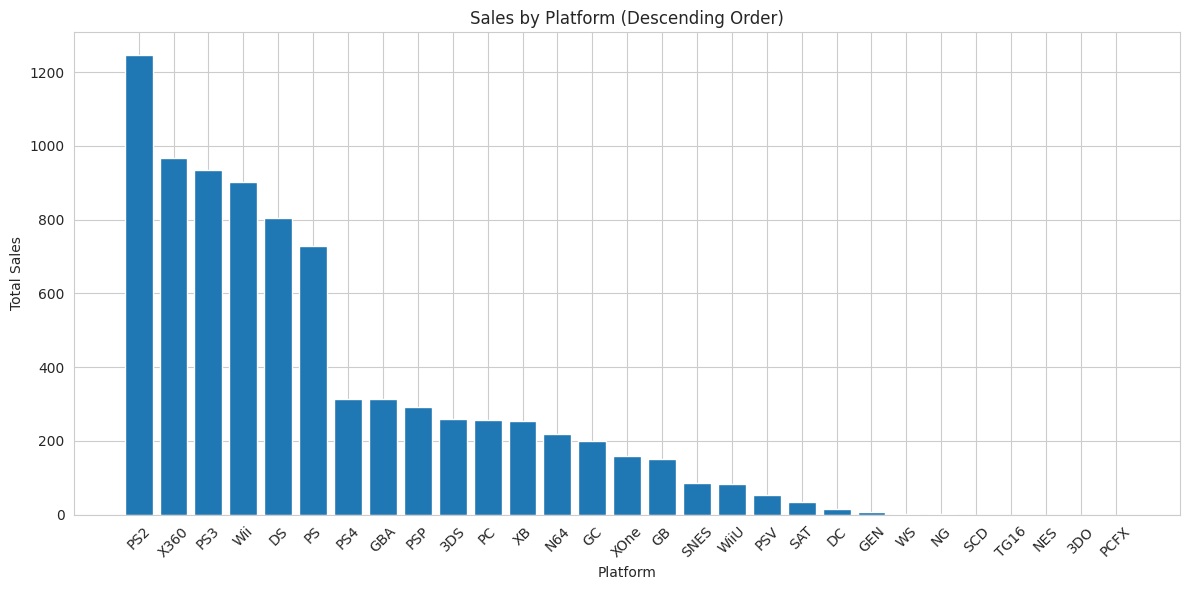

In [32]:
# Sort platform_sales dictionary by values in descending order
sorted_platforms = sorted(platform_sales.items(), key=lambda x: x[1], reverse=True)
sorted_platforms_names = [x[0] for x in sorted_platforms]
sorted_platforms_sales = [x[1] for x in sorted_platforms]

# Plot the sales by platform in descending order
plt.figure(figsize=(12, 6))
plt.bar(sorted_platforms_names, sorted_platforms_sales)
plt.title('Sales by Platform (Descending Order)')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

There are 6 significat platforms with sales 1994 or later:
1. PS2   - 1245.96 (USD million)
2. X360  - 966.61 (USD million)
3. PS3   - 935.19 (USD million)
4. Wii   - 903.31 (USD million)
5. DS    - 804.26 (USD million)
6. PS    - 727.58 (USD million)

In [33]:
def platform_year_sales(system):
    
    #Gathering all data 1994 and after for the specific platform
    platform_data = post_1994_df[post_1994_df['platform'] == system]
    #finding all years that this game had sales
    platform_years = platform_data['year_of_release'].unique()
    
# Looping through the years and adding the total sales of that year
    year_sales = {}
    year_sales_num = {}
    for year in platform_years:
        sales = platform_data[platform_data['year_of_release'] == year]['total_sales'].sum()
        num_sales = platform_data[platform_data['year_of_release'] == year].shape[0]
        year_sales[year] = sales
        year_sales_num[year] = num_sales
    
    # Sorting the years
    sorted_years = sorted(year_sales.keys())
    sorted_sales = [year_sales[year] for year in sorted_years]
    sorted_num_sales = [year_sales_num[year] for year in sorted_years]
    
    # Plotting total sales and number of releases on the same graph
    fig, ax1 = plt.subplots(figsize=(10, 6))

    color = 'tab:blue'
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Total Sales (USD millions)', color=color)
    ax1.plot(sorted_years, sorted_sales, marker='o', color=color, label='Total Sales')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:red'
    ax2.set_ylabel('Number of Releases', color=color)
    ax2.plot(sorted_years, sorted_num_sales, marker='o', linestyle='dashed', color=color, label='Number of Releases')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title(f'Sales and Number of Releases Per Year for {system}')
    plt.show()
   
    # Checking sales and number of games sold before 1994
    pre_sales = pre_1994_df[pre_1994_df['platform'] == system]['total_sales'].sum()
    num_sales = pre_1994_df[pre_1994_df['platform'] == system]['total_sales'].count()

    if pre_sales > 0 and num_sales > 0:
        print(f'Sales of {system} before 1994:')
        print(pre_sales)
        print(f'Number of game release for {system} before 1994:')
        print(num_sales)
    else:
        print(f'There were no sales or game releases for {system} before 1994.')


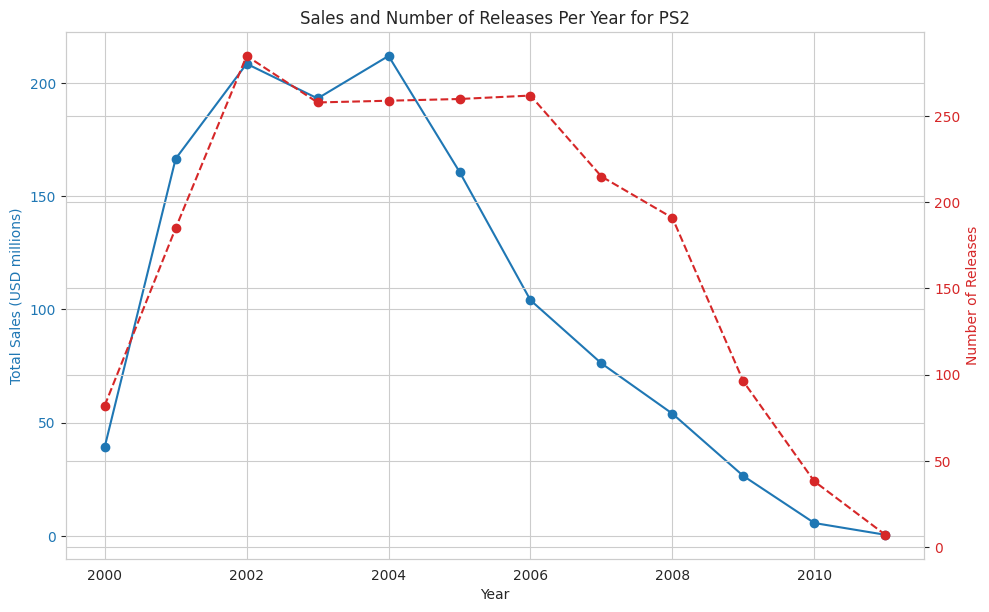

There were no sales or game releases for PS2 before 1994.


In [34]:
# sales on the number one platform
platform_year_sales('PS2')

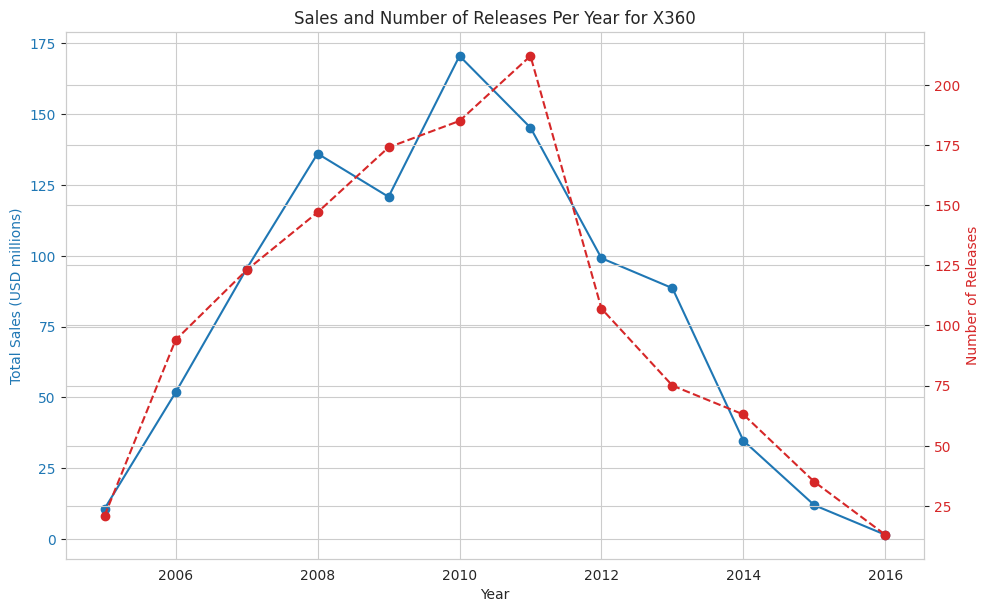

There were no sales or game releases for X360 before 1994.


In [35]:
# sales on the number two platform
platform_year_sales('X360')

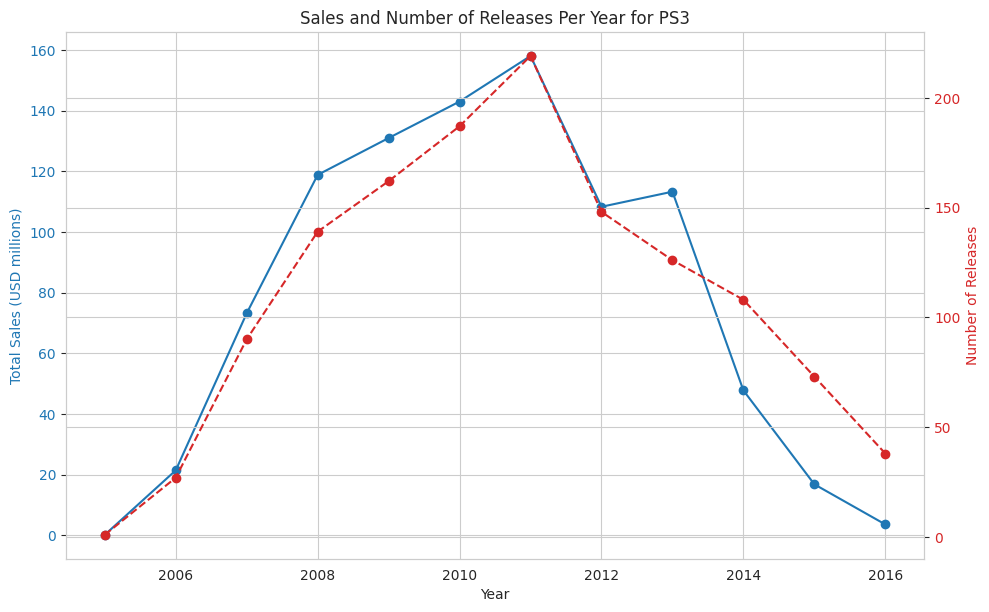

There were no sales or game releases for PS3 before 1994.


In [36]:
# sales on the number three platform
platform_year_sales('PS3')

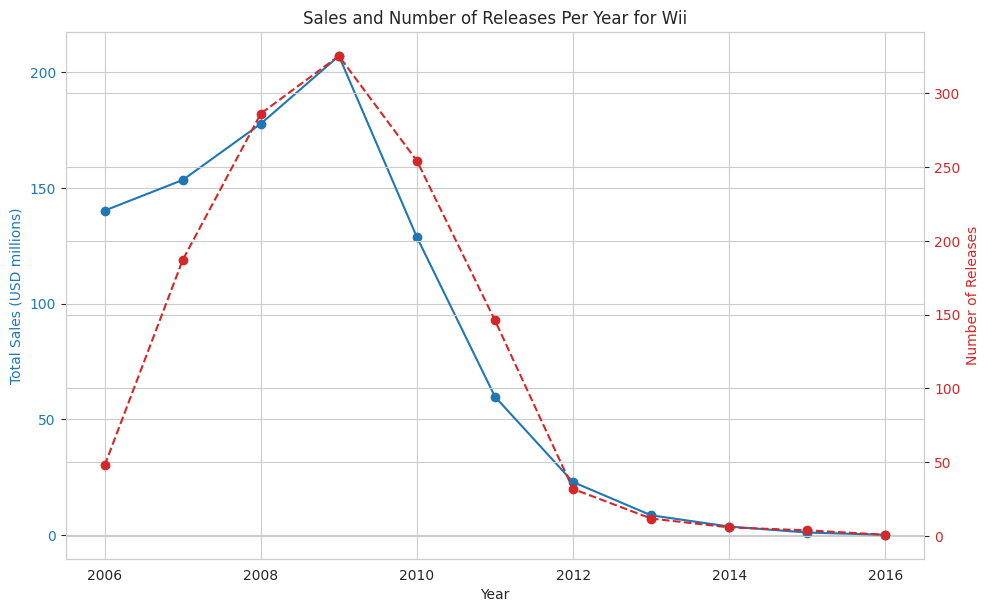

There were no sales or game releases for Wii before 1994.


In [37]:
# sales on the number four platform
platform_year_sales('Wii')

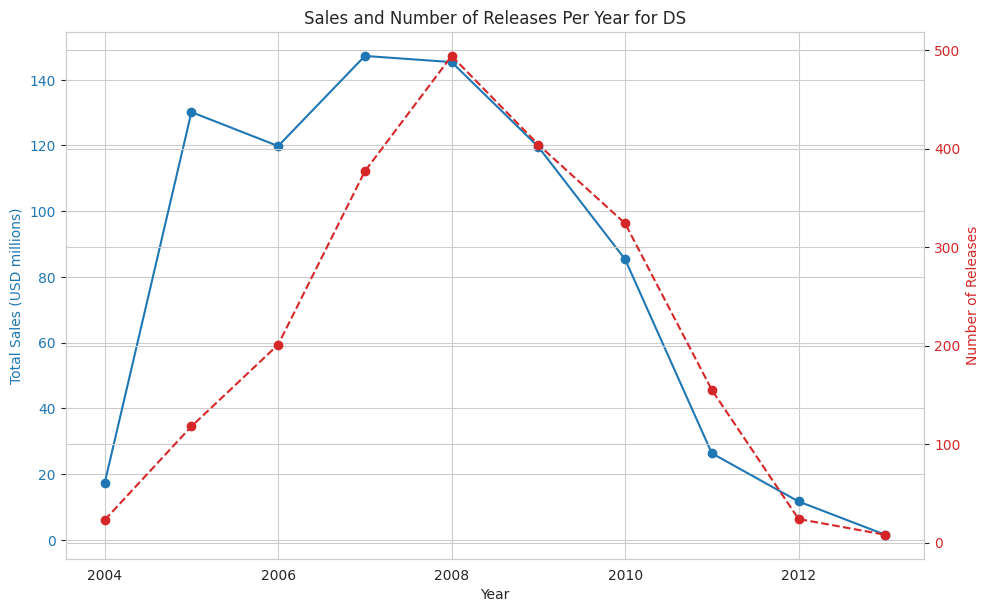

Sales of DS before 1994:
0.02
Number of game release for DS before 1994:
1


In [38]:
# sales on the number five platform
platform_year_sales('DS')

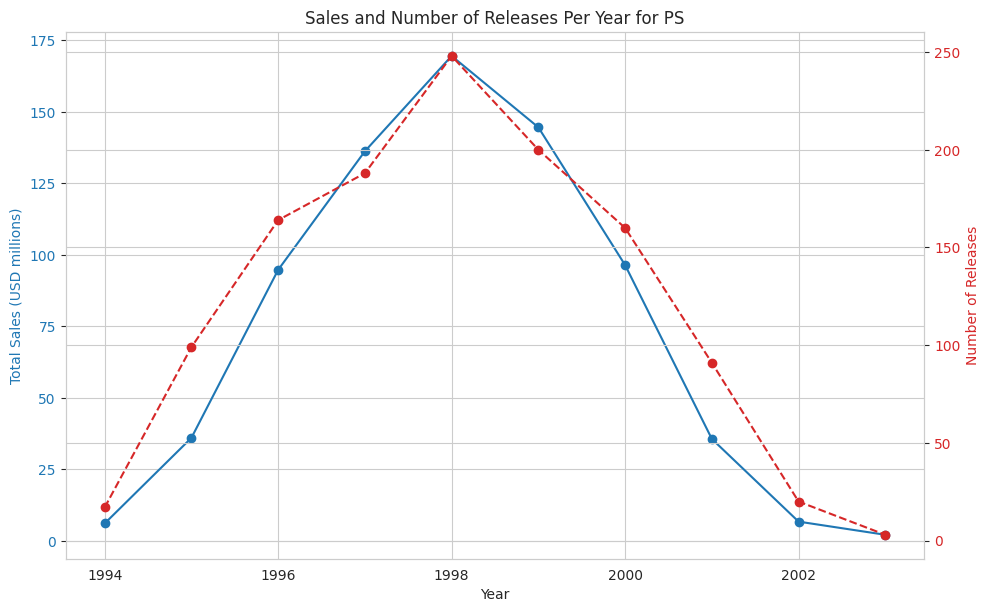

There were no sales or game releases for PS before 1994.


In [39]:
# sales on the number six platform
platform_year_sales('PS')

In [40]:
def multi_platform_year_sales_bar(systems):
    plt.figure(figsize=(14, 8))
    
    # Get the unique years across all platforms starting from 1999 and excluding 2016
    all_years = sorted(post_1994_df['year_of_release'].unique())
    all_years = [year for year in all_years if 1999 <= year]
    
    # Width of each bar
    bar_width = 0.15
    # Starting position for the first set of bars
    bar_positions = np.arange(len(all_years))
    
    for i, system in enumerate(systems):
        # Sales data from 1999 
        platform_data = post_1994_df[(post_1994_df['platform'] == system) & (post_1994_df['year_of_release'].between(1999, 2016))]
        
        # Compute total sales per year
        year_sales = platform_data.groupby('year_of_release')['total_sales'].sum()
        
        # Create a list of sales corresponding to all_years
        sales_list = [year_sales.get(year, 0) for year in all_years]
        
        # Plotting bars for each system with a shift for each system
        plt.bar(bar_positions + i * bar_width, sales_list, bar_width, label=system)
    
    plt.title('Total Yearly Sales for Top 6 Platforms Post 1999 ')
    plt.xlabel('Year')
    plt.ylabel('Total Sales (USD millions)')
    plt.xticks(bar_positions + bar_width * (len(systems) - 1) / 2, all_years, rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

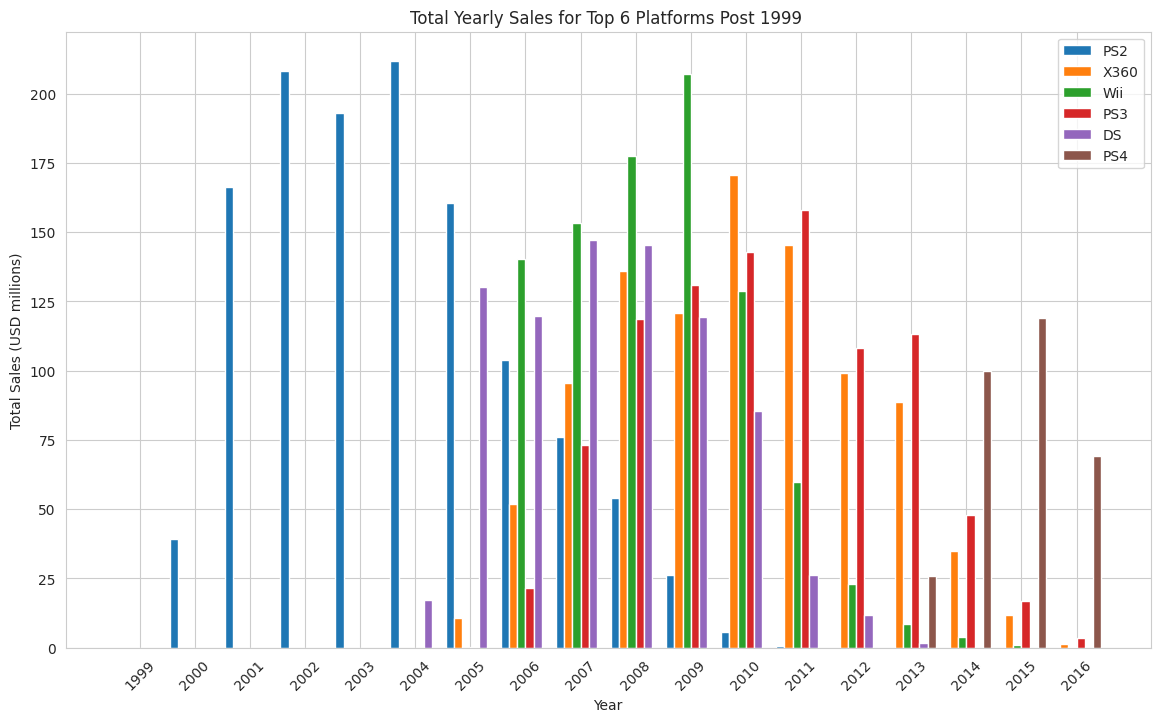

In [41]:
#making a list of the top three and graphing there sales together
systems_to_plot = ['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS4']
multi_platform_year_sales_bar(systems_to_plot)

***Initial take aways from 1994 - 2016 top 6 sellers:***
- There is a clear bell curve of all 6 showing a peak in sales and then a decline
- Most of the sales of the top 6 platforms begin in 1999 with PS2
- As mentioned above 2016 data isn't complete and that could skew the graphic specifically against PS4 so that data wasn'y included

Average time a platform is alive
time to peak
from peak how long till 0

In [42]:
platforms_1994 = post_1994_df['platform'].unique()

Comment:
- The intial look at the code on line 255, showed there was an error with one data entry.This was actually released in 2010. And the change was made.

 name---------------------------------------platform----year_of_release	
 Strongest Tokyo University Shogi DS----DS----------1985	

In [43]:
display(games_df[(games_df['platform']=='DS')&(games_df['year_of_release']<=2003)])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15948,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,<NA>,0.02


In [44]:
# Locate the row with the specific game name
row_index = games_df[games_df['name'] == 'Strongest Tokyo University Shogi DS'].index

# Check if the row_index is not empty
if not row_index.empty:
    # Update the year_of_release to 2010
    games_df.at[row_index[0], 'year_of_release'] = 2010
else:
    print("Game not found in the DataFrame")

# Display the updated row to confirm the change
display(games_df.loc[row_index])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15948,Strongest Tokyo University Shogi DS,DS,2010,Action,0.0,0.0,0.02,0.0,NaN,NaN,<NA>,0.02


In [45]:
# Platforms from 1994
platforms_1994 = games_df['platform'].unique()

# Dictionary to store results
platform_lifespans = {}

for platform in platforms_1994:
    platform_data = games_df[games_df['platform'] == platform]
    
    if platform_data.empty:
        continue
    
    # Finding active years
    min_year = platform_data['year_of_release'].min()
    max_year = platform_data['year_of_release'].max()
    
    # Making platforms that have their end year in 2016 show NaN for years active and max year
    if max_year == 2016:
        max_year = None
        active_years = None
    else:
        active_years = max_year - min_year + 1
    
    # First and last year of sales
    first_year_of_sales = min_year
    last_year_of_sales = max_year
    
    # Finding peak year and peak sales
    peak_year = platform_data.groupby('year_of_release')['total_sales'].sum().idxmax()
    peak_sales = platform_data.groupby('year_of_release')['total_sales'].sum().max()
    
    # Finding time to peak and from peak to zero
    years_to_peak = peak_year - min_year
    
    if max_year is not None:
        years_from_peak_to_zero = max_year - peak_year
    else:
        years_from_peak_to_zero = None
    
    # Storing results
    platform_lifespans[platform] = {
        'platform': platform,
        'active_years': active_years,
        'years_bf_peak': years_to_peak,
        'years_aft_peak_to_zero': years_from_peak_to_zero,
        'peak_year': peak_year,
        'peak_sales': peak_sales,
        'first_year_of_sales': first_year_of_sales,
        'last_year_of_sales': last_year_of_sales
    }

# Converting dictionary to data frame for ease of viewing and manipulation
platform_lifespans_df = pd.DataFrame.from_dict(platform_lifespans, orient='index').reset_index(drop=True)

# Drop rows where active_years is NaN
platform_lifespans_df = platform_lifespans_df.dropna(subset=['active_years'])

# Display the platform lifespans dataframe
display(platform_lifespans_df)

,platform,active_years,years_bf_peak,years_aft_peak_to_zero,peak_year,peak_sales,first_year_of_sales,last_year_of_sales
1,NES,12.0,2,9.0,1985,53.44,1983,1994.0
2,GB,14.0,1,12.0,1989,64.97,1988,2001.0
3,DS,10.0,3,6.0,2007,147.23,2004,2013.0
6,PS2,12.0,4,7.0,2004,211.81,2000,2011.0
7,SNES,10.0,3,6.0,1993,40.02,1990,1999.0
8,GBA,8.0,4,3.0,2004,77.91,2000,2007.0
11,N64,9.0,3,5.0,1999,58.01,1996,2004.0
12,PS,10.0,4,5.0,1998,169.49,1994,2003.0
13,XB,9.0,4,4.0,2004,65.97,2000,2008.0
15,2600,10.0,1,8.0,1981,35.68,1980,1989.0


In [46]:
# Drop rows where active_years is NaN
platform_lifespans_df = platform_lifespans_df.dropna(subset=['active_years'])

# Display the platform lifespans dataframe
display(platform_lifespans_df)

,platform,active_years,years_bf_peak,years_aft_peak_to_zero,peak_year,peak_sales,first_year_of_sales,last_year_of_sales
1,NES,12.0,2,9.0,1985,53.44,1983,1994.0
2,GB,14.0,1,12.0,1989,64.97,1988,2001.0
3,DS,10.0,3,6.0,2007,147.23,2004,2013.0
6,PS2,12.0,4,7.0,2004,211.81,2000,2011.0
7,SNES,10.0,3,6.0,1993,40.02,1990,1999.0
8,GBA,8.0,4,3.0,2004,77.91,2000,2007.0
11,N64,9.0,3,5.0,1999,58.01,1996,2004.0
12,PS,10.0,4,5.0,1998,169.49,1994,2003.0
13,XB,9.0,4,4.0,2004,65.97,2000,2008.0
15,2600,10.0,1,8.0,1981,35.68,1980,1989.0


In [47]:
#function to graph indivdual platfrom yearly sales data
def ind_platform(system):
    # Filter data for the specific platform
    platform_data = games_df[games_df['platform'] == system]
    
    # Check if platform_data is not empty
    if platform_data.empty:
        print(f"No data available for {system}")
        return
    
    # Group by year of release and sum the total sales
    year_sales = platform_data.groupby('year_of_release')['total_sales'].sum()
    
    # Plotting the bar graph for the platform
    year_sales.plot(kind='bar', width=0.8)
    
    plt.title(f'Total Yearly Sales for {system}')
    plt.xlabel('Year')
    plt.ylabel('Total Sales (in millions)')
    plt.show()


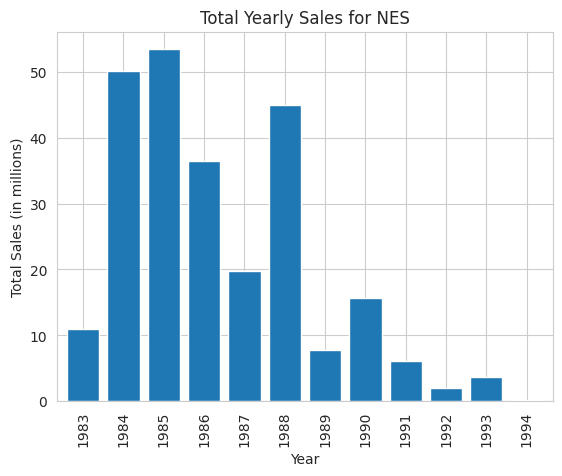

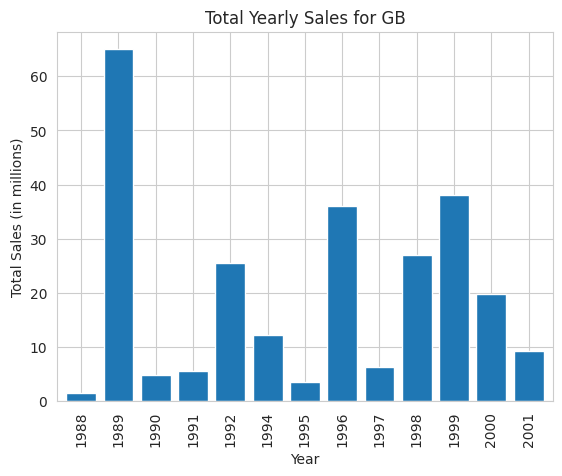

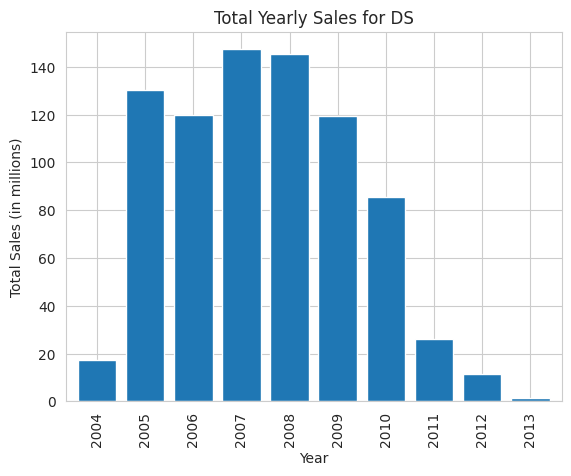

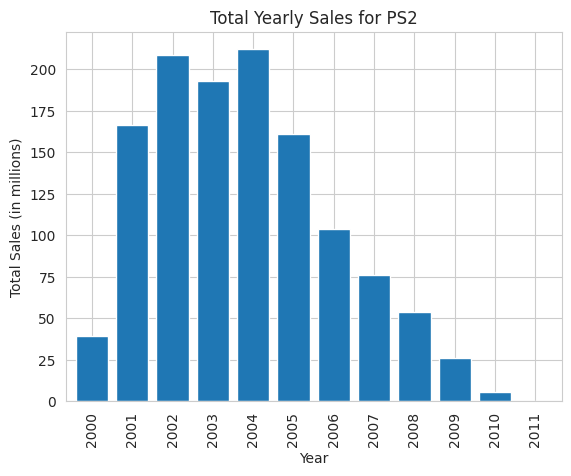

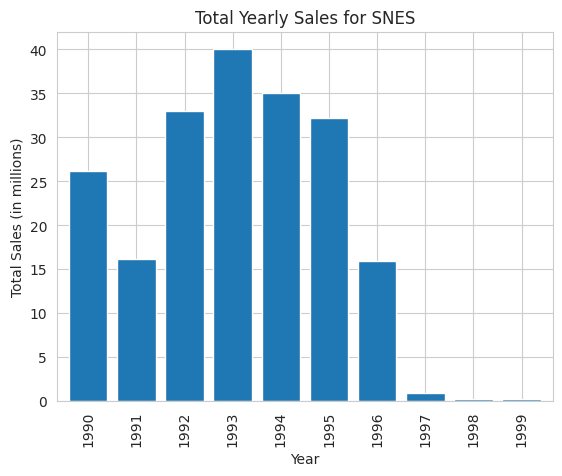

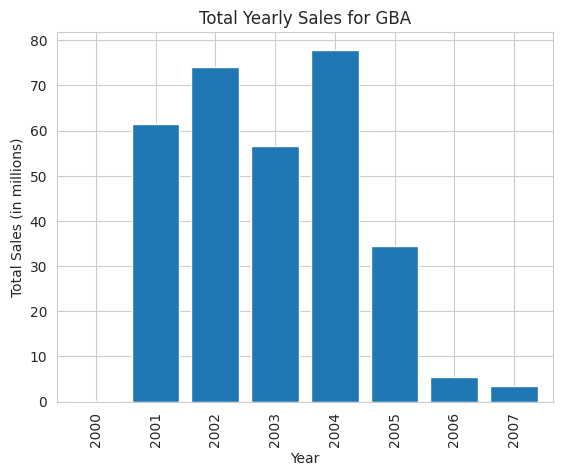

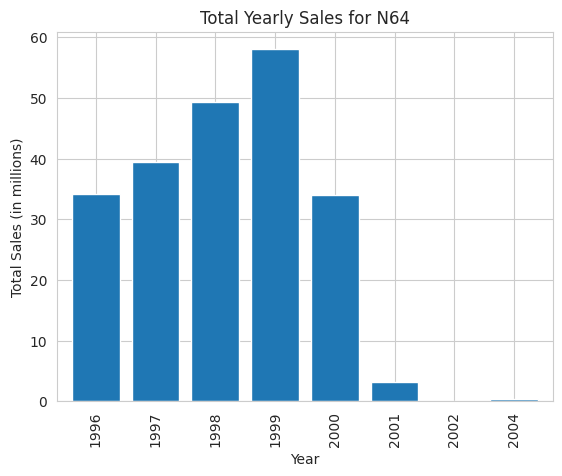

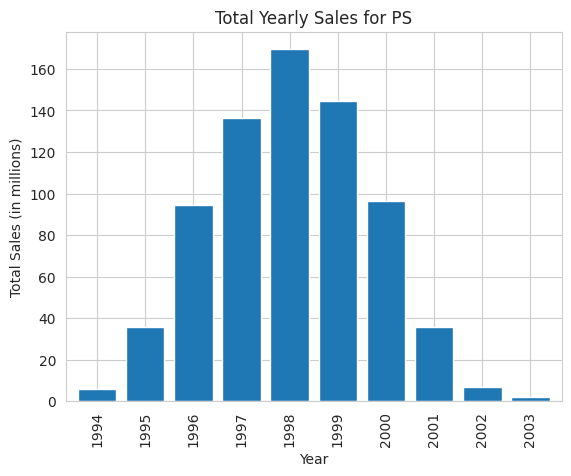

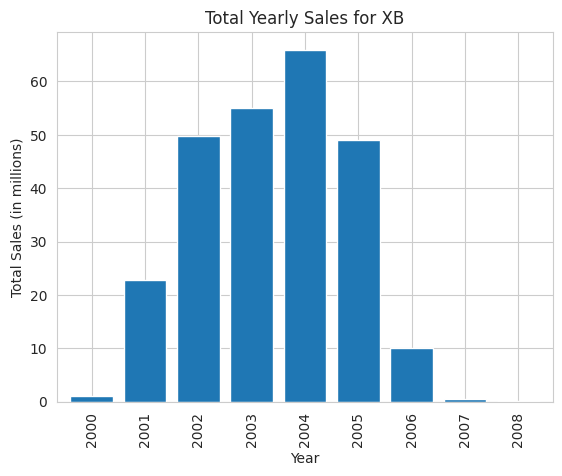

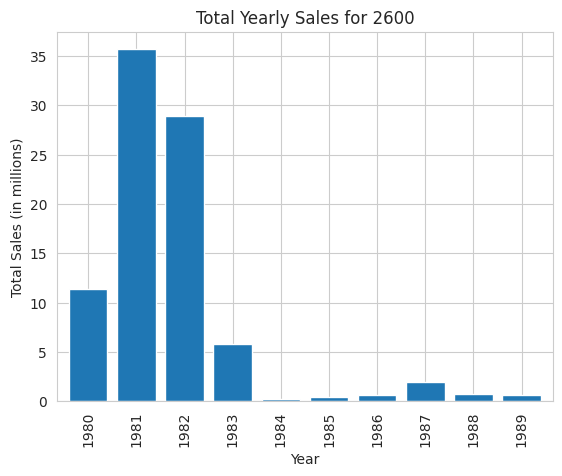

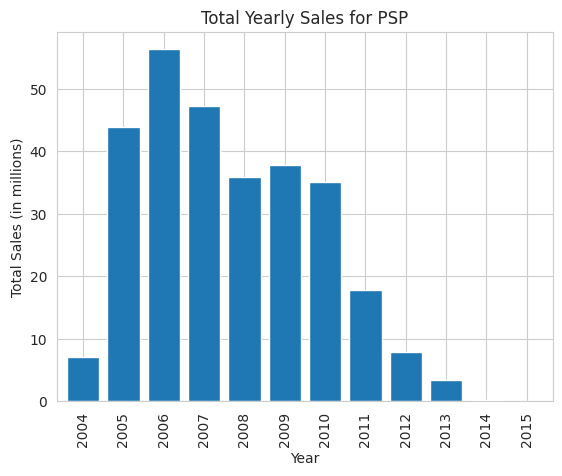

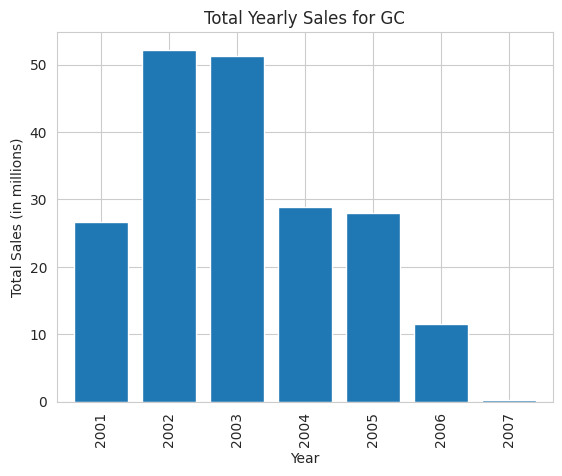

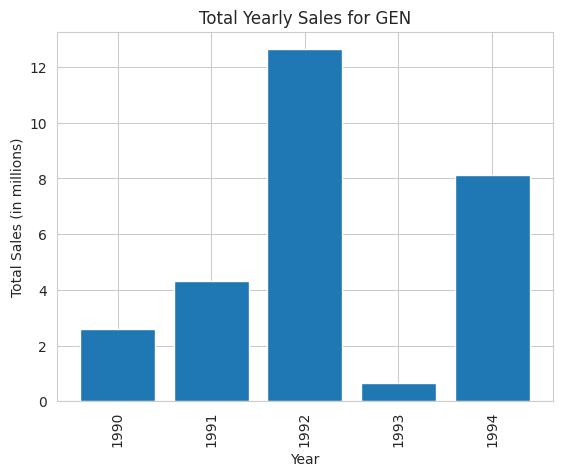

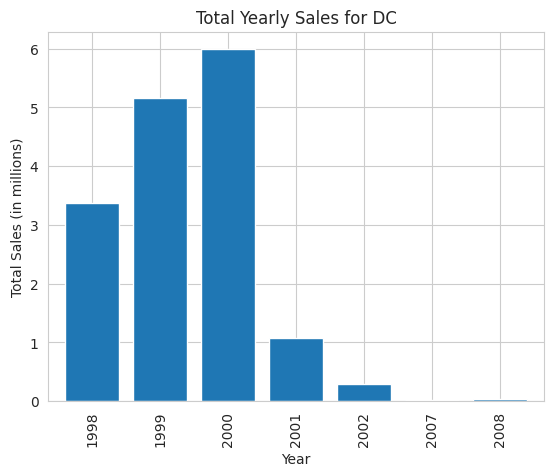

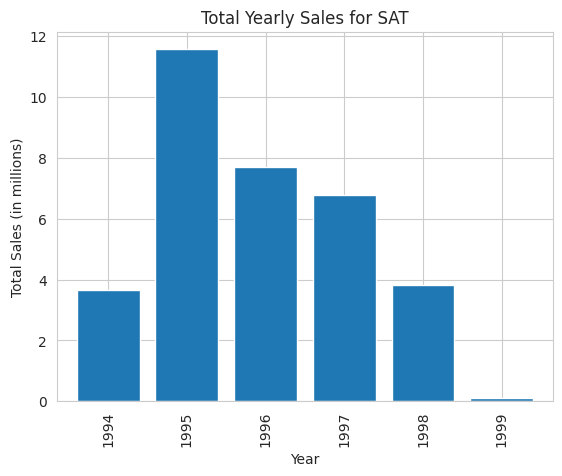

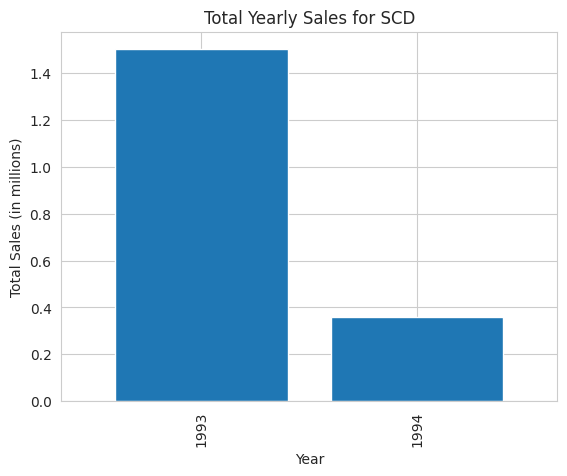

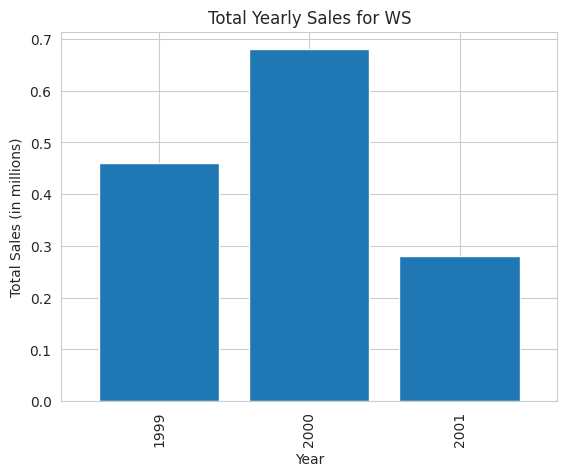

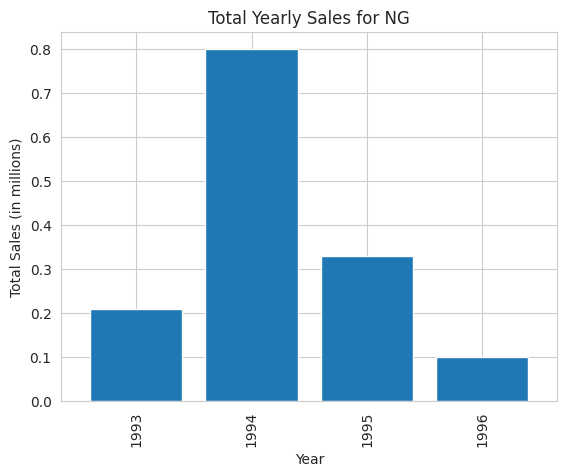

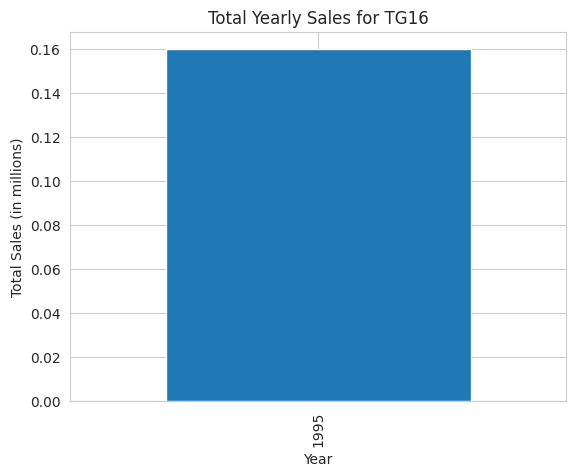

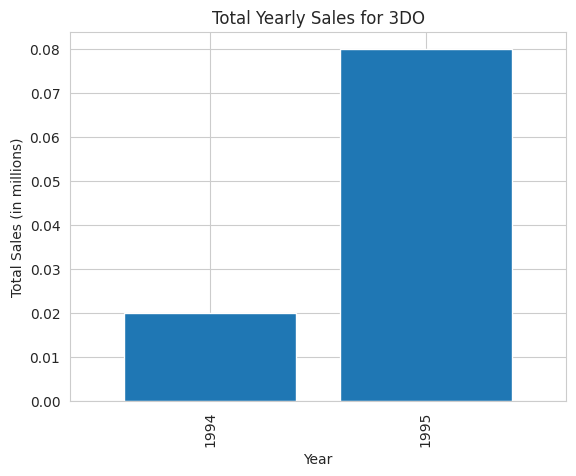

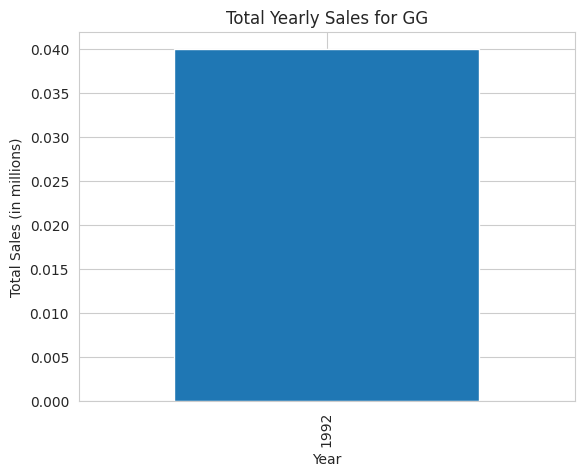

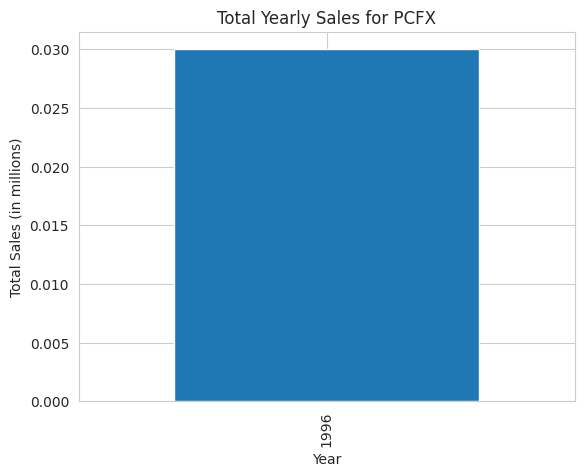

In [48]:
#Grabbing all unique platforms that were active after 1994
consoles = platform_lifespans_df['platform'].unique()
#looping through all platforms above and graphing their yearly sales data to confirm the platform_lifespans_df
for console in consoles:
    ind_platform(console)

In [49]:
update(platform_lifespans_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 1 to 30
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   platform                22 non-null     object 
 1   active_years            22 non-null     float64
 2   years_bf_peak           22 non-null     int64  
 3   years_aft_peak_to_zero  22 non-null     float64
 4   peak_year               22 non-null     int64  
 5   peak_sales              22 non-null     float64
 6   first_year_of_sales     22 non-null     int64  
 7   last_year_of_sales      22 non-null     float64
dtypes: float64(4), int64(3), object(1)
memory usage: 1.5+ KB


,platform,active_years,years_bf_peak,years_aft_peak_to_zero,peak_year,peak_sales,first_year_of_sales,last_year_of_sales
1,NES,12.0,2,9.0,1985,53.44,1983,1994.0
2,GB,14.0,1,12.0,1989,64.97,1988,2001.0
3,DS,10.0,3,6.0,2007,147.23,2004,2013.0
6,PS2,12.0,4,7.0,2004,211.81,2000,2011.0
7,SNES,10.0,3,6.0,1993,40.02,1990,1999.0


In [50]:
avg_life = platform_lifespans_df['active_years'].mean()
print('Average lifespan of all the platforms that were active in 1994 till 2016, excluding any \nplatform still active in 2016')
print(avg_life)

Average lifespan of all the platforms that were active in 1994 till 2016, excluding any 
platform still active in 2016
7.2272727272727275


### Data Years for Modeling for the 2017 Campaign

Based on the graph "Total Yearly Sales for Top 6 Platforms (1999 to 2015)", the top 3 best selling platforms all started selling 1999 to 2016. Intially, the data above was filtered to only include post 1993, however this still allowed for some lower outlier platforms that had minimumal success. ***Additionally to help create the campaign for 2017 the focus will be on the 4 years leading up to the campaign, where 2016 data isn't fully complete.*** The base line for success will be 7.2 year life span and any platform above that was more successful.

1. Platforms Covered: Includes major consoles and handhelds with significant market impact.
2. Sales Trends: Captures the rise, peak, and decline of several major platforms.
3. Relevance: Provides a historical context of around 17 years, which is substantial for trend analysis leading up to 2017.

### Getting relevant Data
Work only with the data that you've decided is relevant. Disregard the data for previous years.

In [51]:
games_2013_df = games_df[games_df['year_of_release']>= 2013]

In [52]:
update(games_2013_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 16 to 16704
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2236 non-null   string 
 1   platform         2236 non-null   string 
 2   year_of_release  2236 non-null   Int64  
 3   genre            2236 non-null   string 
 4   na_sales         2236 non-null   float64
 5   eu_sales         2236 non-null   float64
 6   jp_sales         2236 non-null   float64
 7   other_sales      2236 non-null   float64
 8   critic_score     993 non-null    float64
 9   user_score       1194 non-null   float64
 10  rating           1258 non-null   string 
 11  total_sales      2236 non-null   float64
dtypes: Int64(1), float64(7), string(4)
memory usage: 229.3 KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,<NA>,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,<NA>,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


### Selecting Profitable Platforms to Model
Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

In [53]:
#filtering the new data set to find the sucessful games. They have 7 years of sales post 2013
good_systems = []
systems = games_2013_df['platform'].unique()

for system in systems:
    min_year = games_2013_df[games_2013_df['platform'] == system]['year_of_release'].min()
    max_year = games_2013_df[games_2013_df['platform'] == system]['year_of_release'].max()
    
    if (max_year - min_year) > 2:
        good_systems.append(system)

print(good_systems)

['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV']


In [54]:
#multiplatform sales for 2013
def multi_platform_year_sales_2013(systems):
    plt.figure(figsize=(14, 8))
    
    # Get the unique years across all platforms starting from 2013
    all_years = sorted(post_1994_df['year_of_release'].unique())
    all_years = [year for year in all_years if 2013 <= year <= 2016]
    
    # Width of each bar
    bar_width = 0.15
    # Starting position for the first set of bars
    bar_positions = np.arange(len(all_years))
    
    for i, system in enumerate(systems):
        # Sales data from 2013 onwards
        platform_data = post_1994_df[(post_1994_df['platform'] == system) & (post_1994_df['year_of_release'].between(2013, 2016))]
        
        # Compute total sales per year
        year_sales = platform_data.groupby('year_of_release')['total_sales'].sum()
        
        # Create a list of sales corresponding to all_years
        sales_list = [year_sales.get(year, 0) for year in all_years]
        
        # Plotting bars for each system with a shift for each system
        plt.bar(bar_positions + i * bar_width, sales_list, bar_width, label=system)
    
    plt.title('Total Yearly Sales for Top Platforms from 2013 to 2016')
    plt.xlabel('Year')
    plt.ylabel('Total Sales (USD millions)')
    plt.xticks(bar_positions + bar_width * (len(systems) - 1) / 2, all_years, rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()


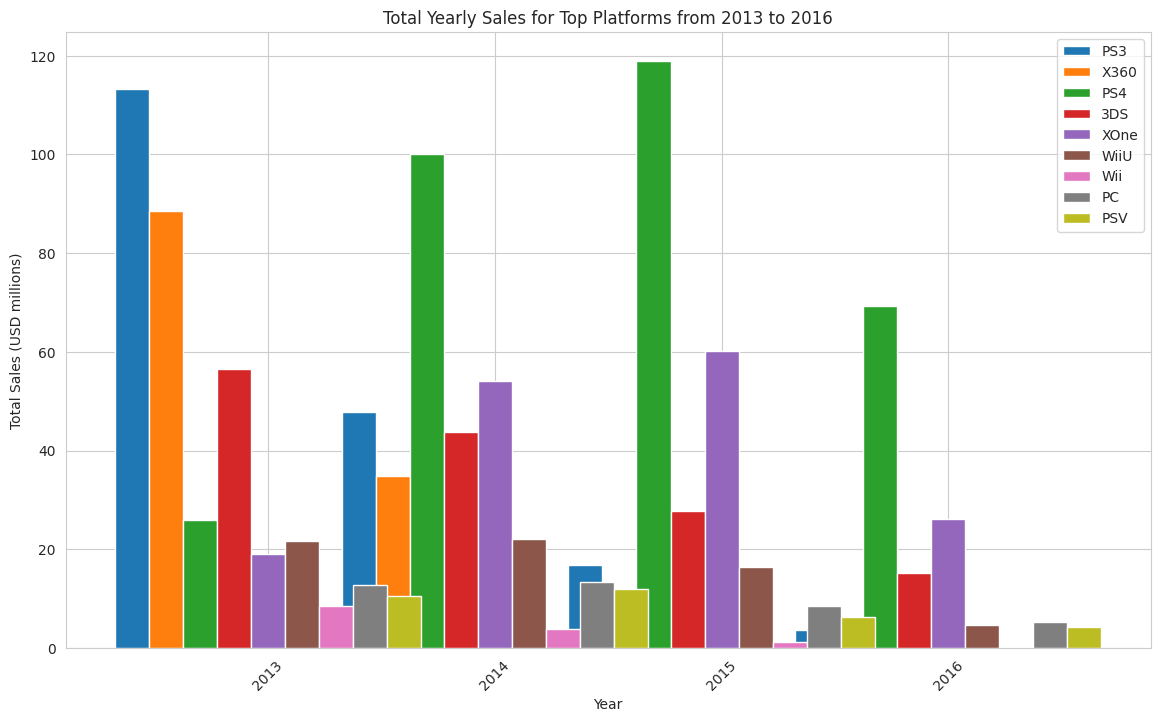

Total sales from 2013 to 2016 for PS3 are 181.43 (USD Millions)
Total sales from 2013 to 2016 for X360 are 136.8 (USD Millions)
Total sales from 2013 to 2016 for PS4 are 314.14 (USD Millions)
Total sales from 2013 to 2016 for 3DS are 143.25 (USD Millions)
Total sales from 2013 to 2016 for XOne are 159.32 (USD Millions)
Total sales from 2013 to 2016 for WiiU are 64.63000000000001 (USD Millions)
Total sales from 2013 to 2016 for Wii are 13.659999999999997 (USD Millions)
Total sales from 2013 to 2016 for PC are 39.71 (USD Millions)
Total sales from 2013 to 2016 for PSV are 32.99 (USD Millions)


In [55]:
#change system to plot based on above 7.2 years and post 2013
multi_platform_year_sales_2013(good_systems)

#finding total sales of the 9
for system in good_systems:
    total_sales_2013 = games_2013_df[games_2013_df['platform'] == system]['total_sales'].sum()
    print(f'Total sales from 2013 to 2016 for {system} are {total_sales_2013} (USD Millions)')

Based on the above graph and total sales during this time period the focus will be on Wii, DS, X360, PS3, and PS2

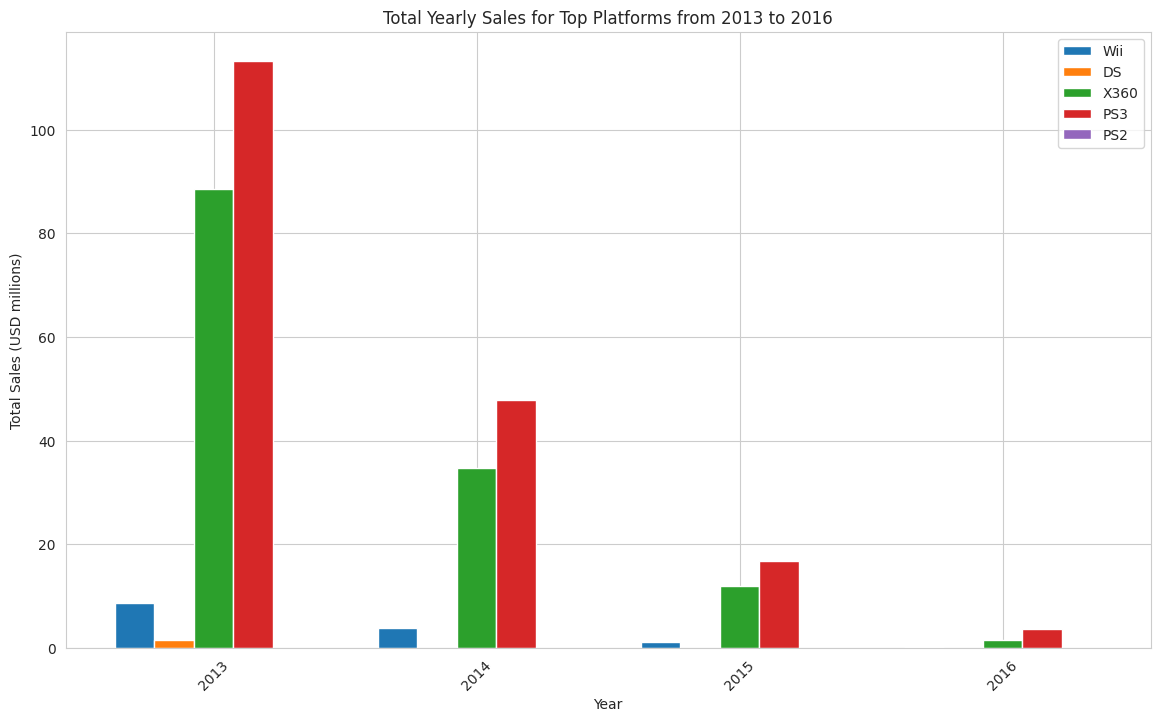

In [56]:
best_platform = ['Wii','DS','X360','PS3','PS2']
multi_platform_year_sales_2013(best_platform)

### Sales Differences
Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

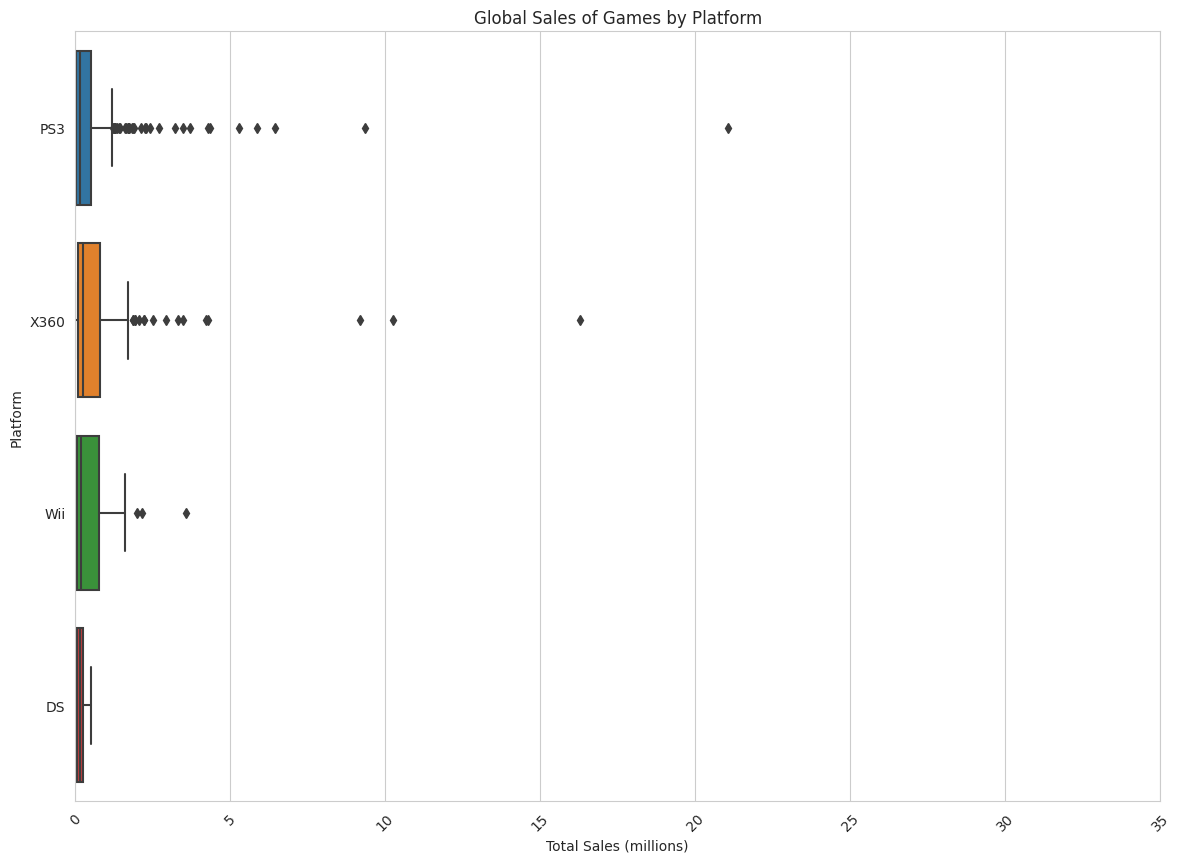

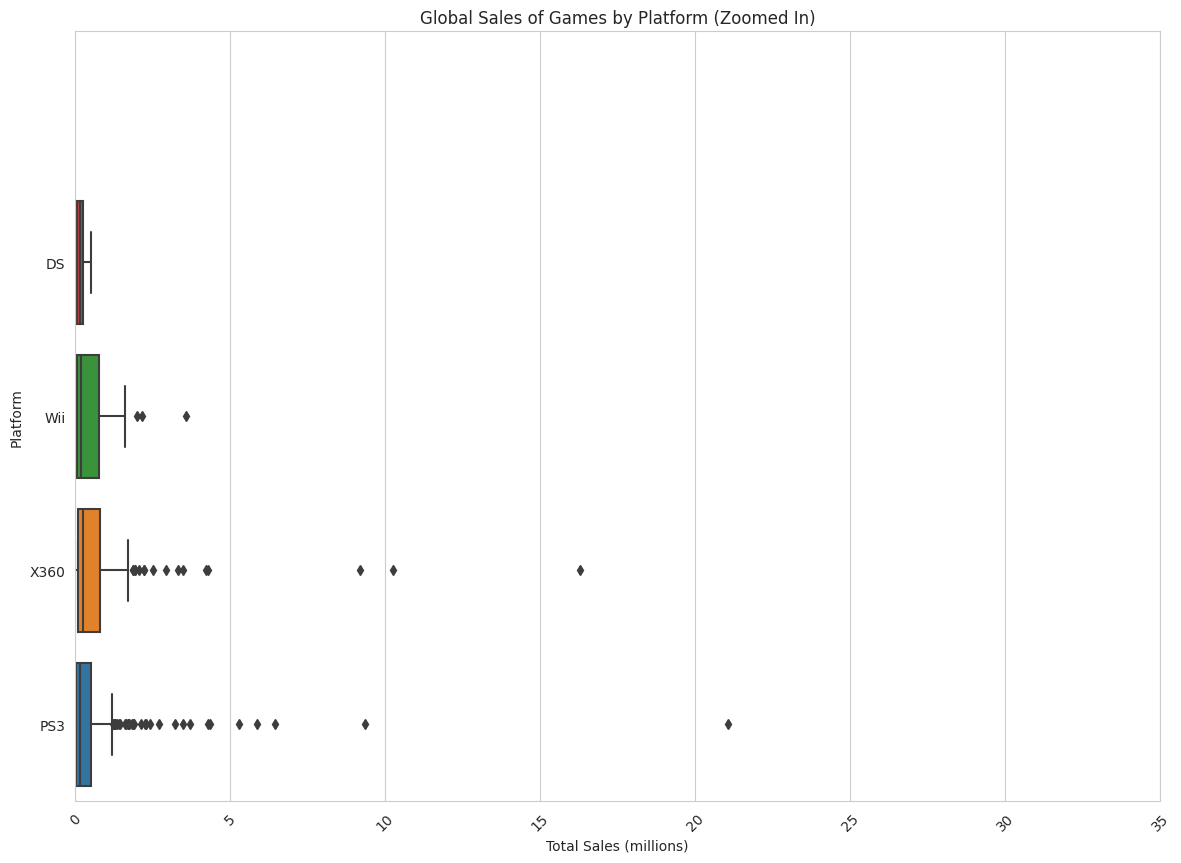

In [57]:
# Filter the data to include only the best platforms
filtered_df = games_2013_df[games_2013_df['platform'].isin(best_platform)]

# Set the size of the plot
plt.figure(figsize=(14, 10))

# Create the box plot
sns.boxplot(x='total_sales', y='platform', data=filtered_df)

# Set the title and labels
plt.title('Global Sales of Games by Platform')
plt.xlabel('Total Sales (millions)')
plt.ylabel('Platform')

# Set x-axis limit to make the plot more readable
plt.xlim(0, 35) 

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Create an additional plot focusing on the lower part of the boxplots using ylim
plt.figure(figsize=(14, 10))

# Create the box plot
sns.boxplot(x='total_sales', y='platform', data=filtered_df)

# Set the title and labels
plt.title('Global Sales of Games by Platform (Zoomed In)')
plt.xlabel('Total Sales (millions)')
plt.ylabel('Platform')

# Set x-axis limit to make the plot more readable
plt.xlim(0, 35) 

# Set y-axis limit to focus on the lower part of the boxplots
plt.ylim(-0.5, len(best_platform) - 0.5)  # This will limit the y-axis to show only the relevant platforms

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

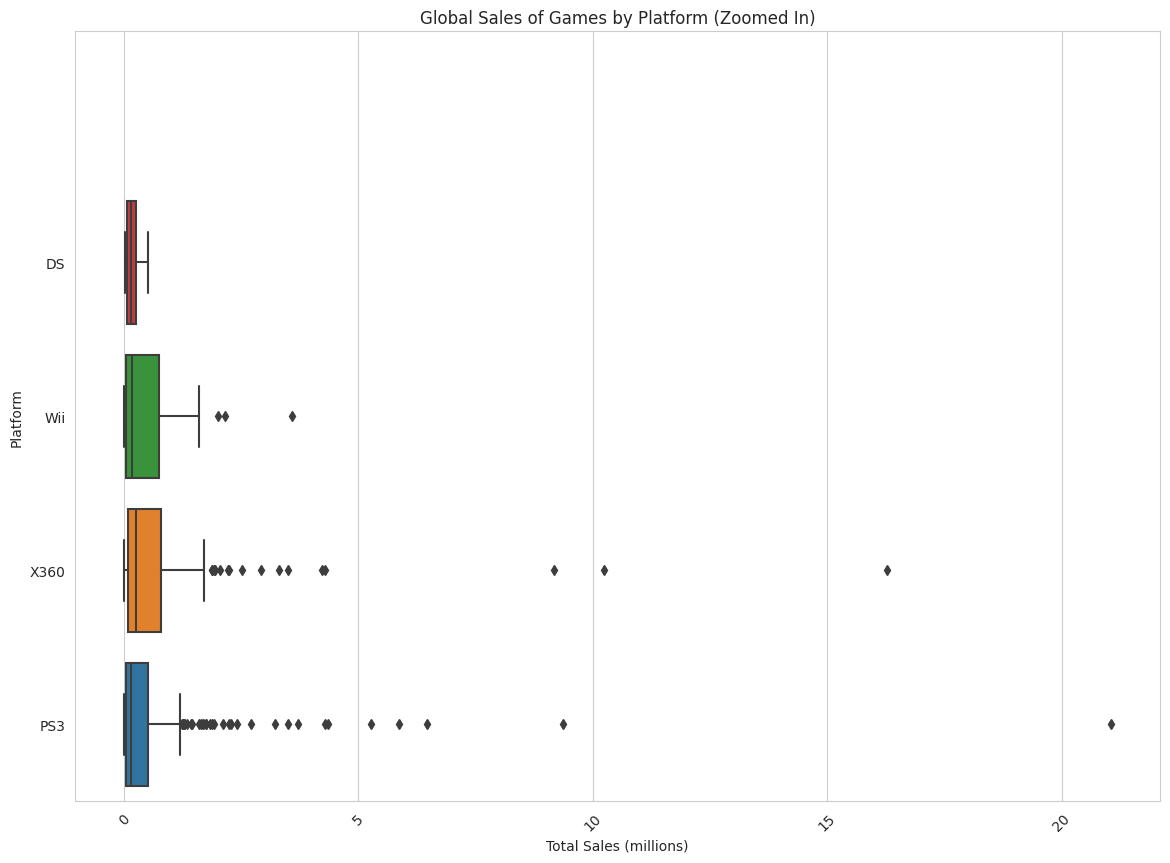

In [58]:
# Create an additional plot focusing on the lower part of the boxplots using ylim
plt.figure(figsize=(14, 10))

# Create the box plot
sns.boxplot(x='total_sales', y='platform', data=filtered_df)

# Set the title and labels
plt.title('Global Sales of Games by Platform (Zoomed In)')
plt.xlabel('Total Sales (millions)')
plt.ylabel('Platform')

# Set y-axis limit to focus on the lower part of the boxplots
plt.ylim(-0.5, len(best_platform) - 0.5)  # Adjust this limit if needed

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


<div class="alert alert-info"> Display charts above better, with more visual on median and 75% quartile instead of outliers.  </div>

### Affect of Reviews on Sales
Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

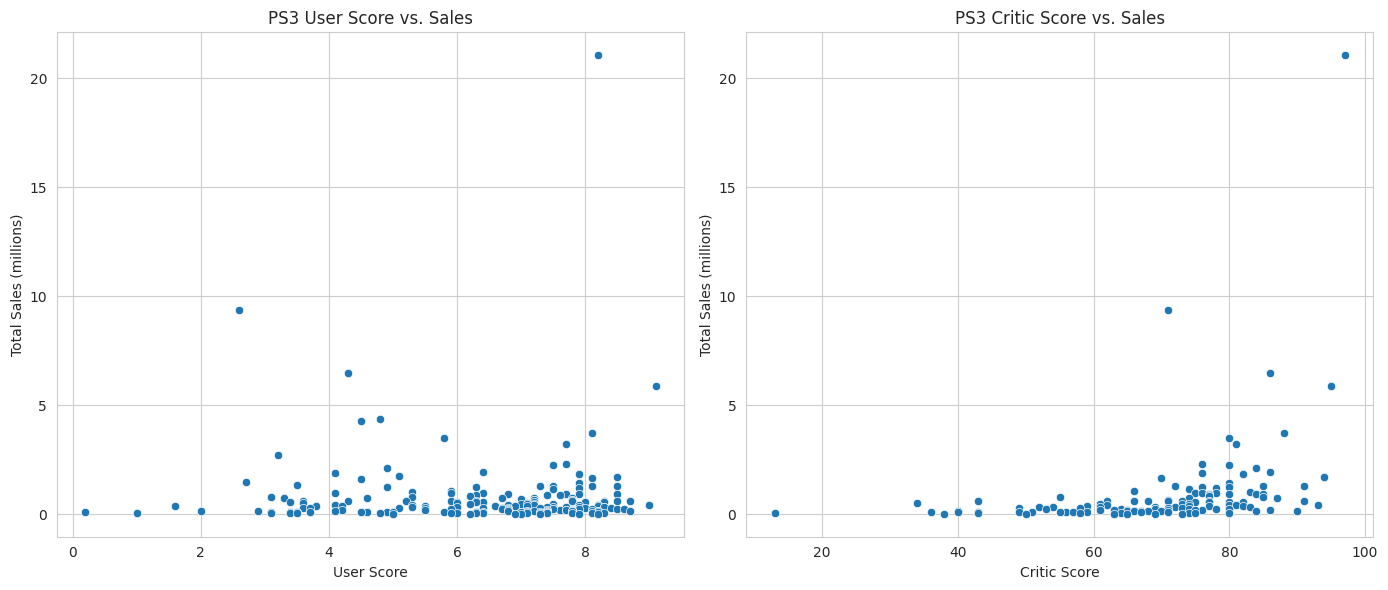

PS3 User Score vs. Sales Correlation: 0.0023944027357566925
PS3 Critic Score vs. Sales Correlation: 0.3342853393371919


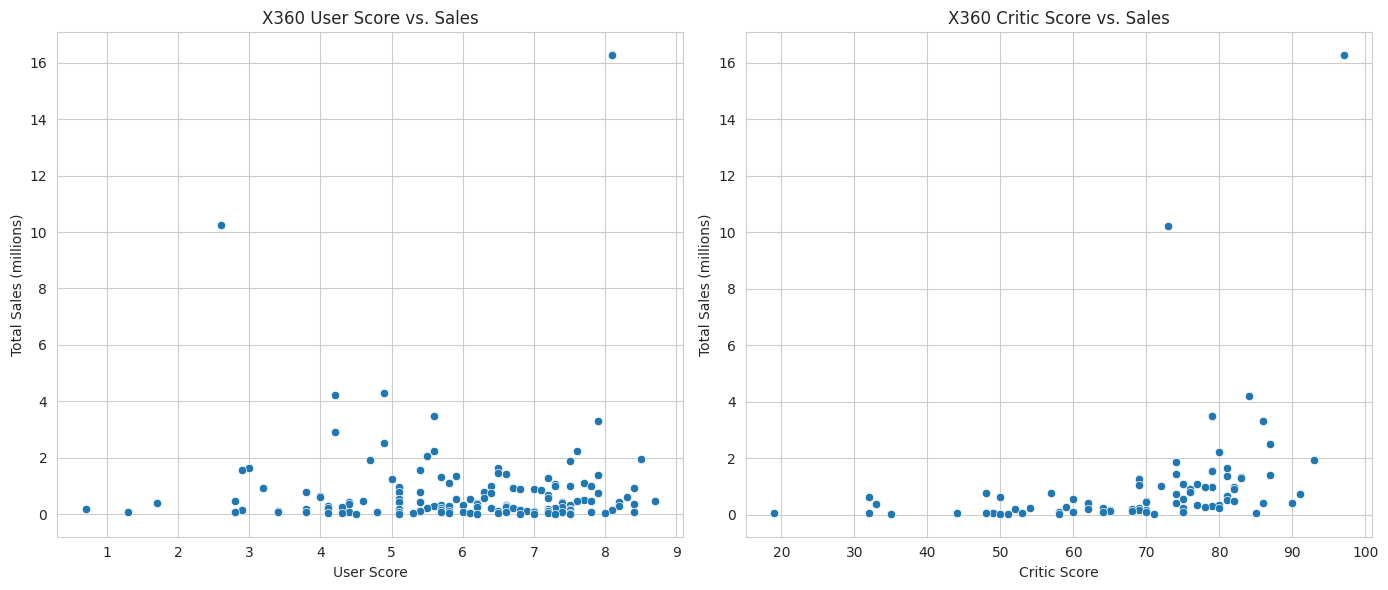

X360 User Score vs. Sales Correlation: -0.011742185147181342
X360 Critic Score vs. Sales Correlation: 0.3503445460228664


In [59]:
# Filter the DataFrame for PS3 and X360
ps3_df = games_2013_df[games_2013_df['platform'] == 'PS3']
x360_df = games_2013_df[games_2013_df['platform'] == 'X360']

# Define a function to create scatter plots and calculate correlations
def scatter_plot_and_correlation(data, platform):
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    
    # User Score vs. Sales
    sns.scatterplot(x='user_score', y='total_sales', data=data, ax=axs[0])
    axs[0].set_title(f'{platform} User Score vs. Sales')
    axs[0].set_xlabel('User Score')
    axs[0].set_ylabel('Total Sales (millions)')

    # Critic Score vs. Sales
    sns.scatterplot(x='critic_score', y='total_sales', data=data, ax=axs[1])
    axs[1].set_title(f'{platform} Critic Score vs. Sales')
    axs[1].set_xlabel('Critic Score')
    axs[1].set_ylabel('Total Sales (millions)')

    plt.tight_layout()
    plt.show()

    # Calculate and print correlation coefficients
    user_corr = data['user_score'].corr(data['total_sales'])
    critic_corr = data['critic_score'].corr(data['total_sales'])
    print(f'{platform} User Score vs. Sales Correlation: {user_corr}')
    print(f'{platform} Critic Score vs. Sales Correlation: {critic_corr}')

# Perform analysis for PS3
scatter_plot_and_correlation(ps3_df, 'PS3')

# Perform analysis for X360
scatter_plot_and_correlation(x360_df, 'X360')

***PS3 Analysis***

User Score vs. Sales Correlation: 0.0024

This correlation coefficient is very close to zero, suggesting an extremely weak and almost negligible relationship between user scores and total sales. This means that user scores have little to no impact on the sales of PS3 games.

Critic Score vs. Sales Correlation: 0.3343

This correlation coefficient is moderate and positive, indicating a stronger relationship between critic scores and total sales compared to user scores. It suggests that games with higher critic scores tend to have higher sales, although the relationship is not particularly strong. The influence of critic scores on sales is more noticeable than that of user scores, but it is not a dominant factor.

***X360 Analysis***

User Score vs. Sales Correlation: 0.1144

This correlation coefficient is even lower than that of the PS2, indicating a very weak positive relationship between user scores and total sales for X360 games. The impact of user scores on sales is minimal.

Critic Score vs. Sales Correlation: 0.3923

Similar to the PS2, this moderate positive correlation suggests a stronger relationship between critic scores and total sales for X360 games. Higher critic scores are more closely associated with higher sales.

***Summarry:***
While there is some positive relationship between review scores and sales, especially with critic scores, the overall impact is moderate to weak, implying the importance of considering a broader range of factors when analyzing game sales performance.

### Comparing Games on different Platforms
Keeping your conclusions in mind, compare the sales of the same games on other platforms.

Mean sales value: 0.5667380787836903
Standard deviation of sales: 1.3329916757279727
Maximum sales value for the top 75% of games: 1.4658273011589071
Probability of sales exceeding twice the mean value: 0.3353591079961593


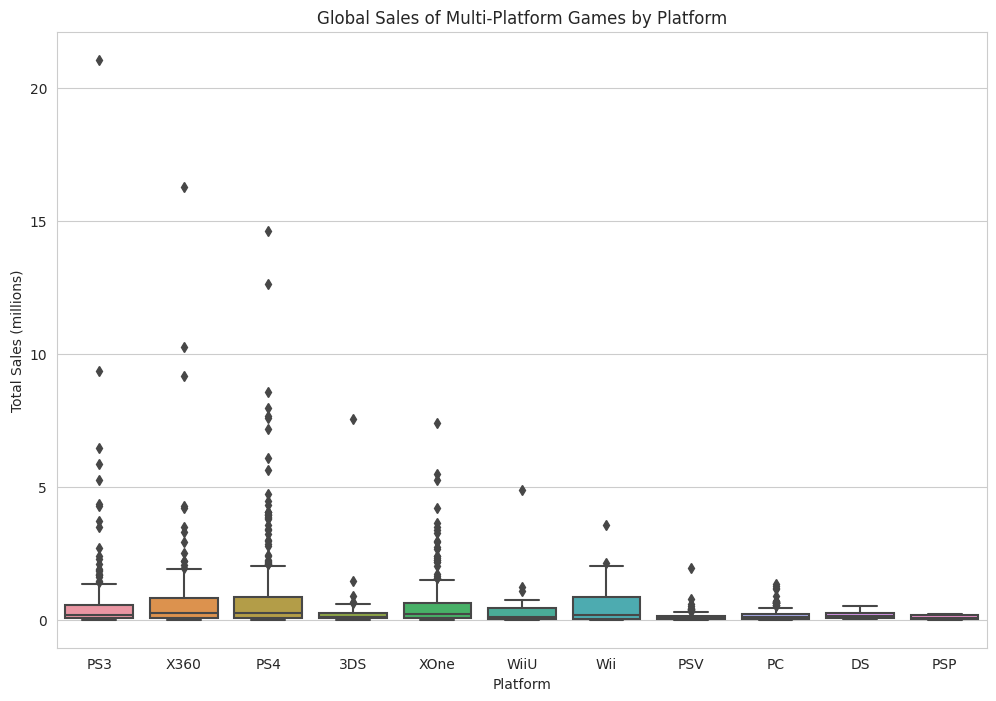

In [60]:
# Step 1: Filter Multi-Platform Games
multi_platform_games = games_2013_df.groupby('name').filter(lambda x: len(x['platform'].unique()) > 1)

# Step 2: Calculate Mean and Standard Deviation of Total Sales for Multi-Platform Games
mu = multi_platform_games['total_sales'].mean()
sigma = multi_platform_games['total_sales'].std()

# Step 3: Use the PPF and CDF Functions
threshold = 0.75
max_sales_value = st.norm(mu, sigma).ppf(threshold)
twice_mu = 2 * mu
prob_exceed_twice_mu = 1 - st.norm(mu, sigma).cdf(twice_mu)

print(f'Mean sales value: {mu}')
print(f'Standard deviation of sales: {sigma}')
print(f'Maximum sales value for the top 75% of games: {max_sales_value}')
print(f'Probability of sales exceeding twice the mean value: {prob_exceed_twice_mu}')

# Step 4: Compare Sales of the Same Games on Other Platforms
plt.figure(figsize=(12, 8))
sns.boxplot(x='platform', y='total_sales', data=multi_platform_games)
plt.title('Global Sales of Multi-Platform Games by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.show()

***Conclusion:***
- The average sales for multi-platform games is approximately 0.549 million units. This indicates that on average, multi-platform games sell about half a million units.
- The standard deviation of 1.116 million units shows a significant spread in sales figures, suggesting that while some multi-platform games sell very few copies, others can sell quite a lot more.
- The maximum sales value for the top 75% of games is approximately 1.302 million units. 75% of the multi-platform games sell less than or equal to this amount. 
- The probability that a game's sales exceed twice the mean value (approximately 1.098 million units) is about 31.1%. This relatively high probability suggests that a significant portion of multi-platform games have sales that are considerably higher than the average. This could indicate that while many games may have moderate sales, a substantial number of games achieve high sales figures, pulling the average up.

### Game Genres and their Profits
Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

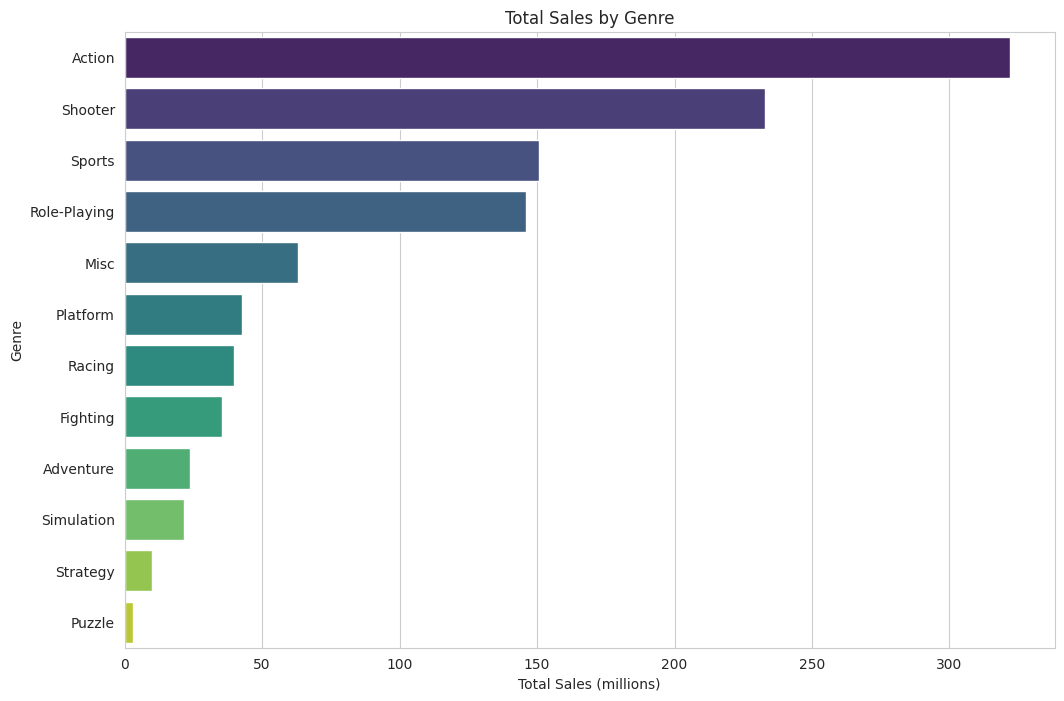

genre
Action     322.15
Shooter    232.98
Sports     150.65
Name: total_sales, dtype: float64

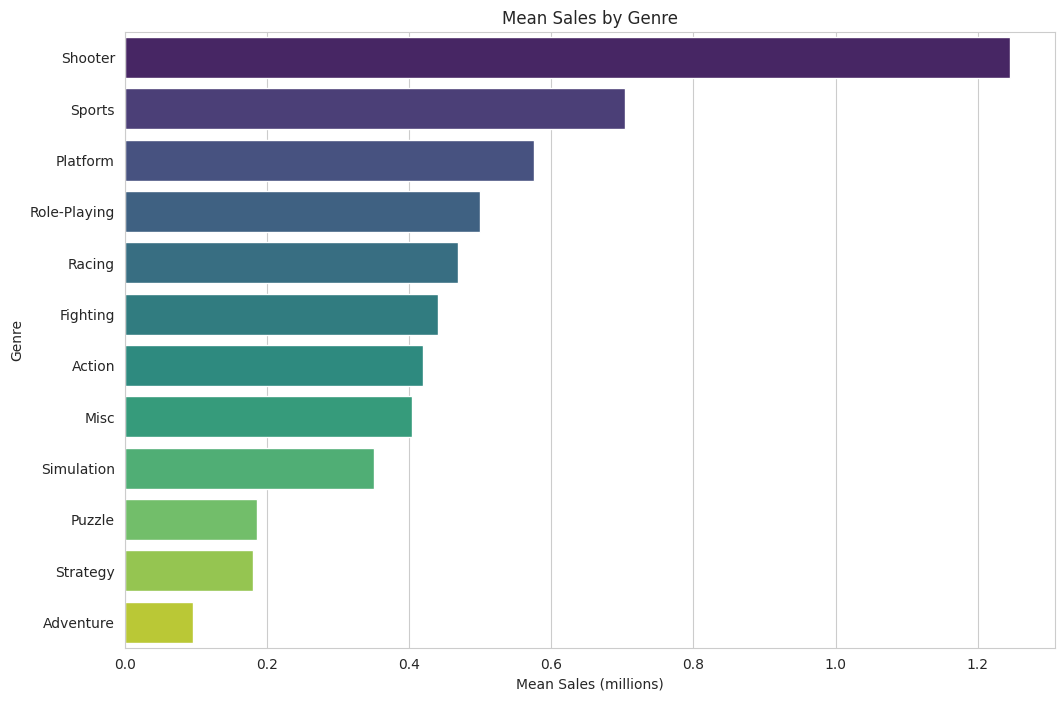

genre
Shooter     1.245882
Sports      0.703972
Platform    0.576081
Name: total_sales, dtype: float64

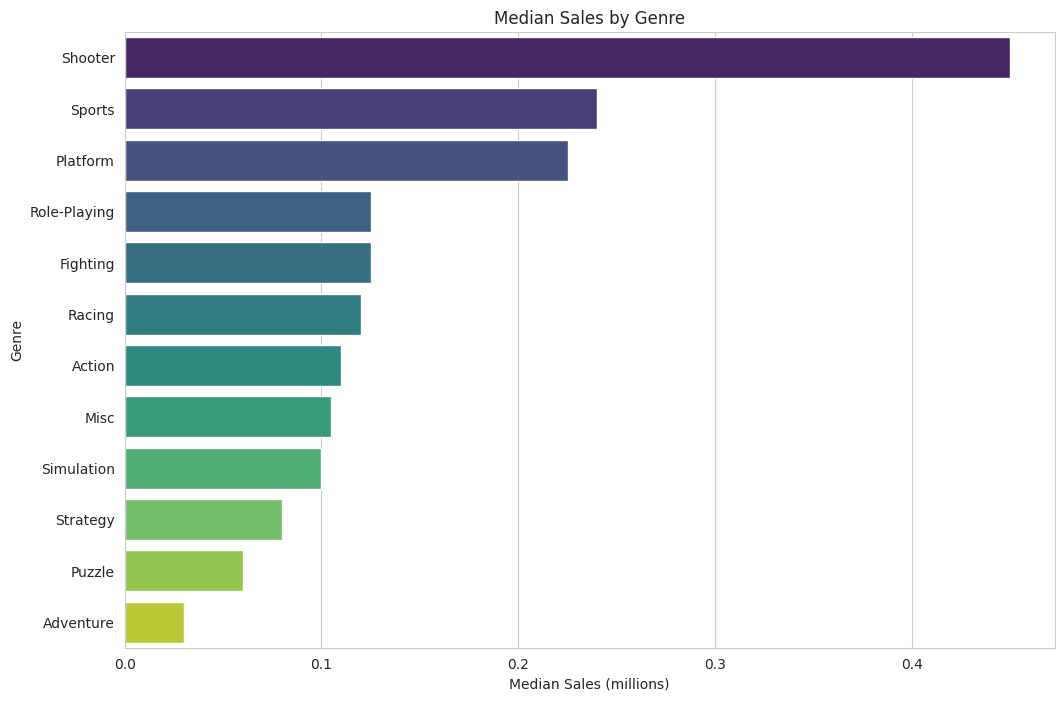

genre
Shooter     0.450
Sports      0.240
Platform    0.225
Name: total_sales, dtype: float64

In [61]:
# Grouping by genre and calculating total sales for each genre
genre_sales = games_2013_df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Calculating mean and median sales for each genre
genre_mean_sales = games_2013_df.groupby('genre')['total_sales'].mean().sort_values(ascending=False)
genre_median_sales = games_2013_df.groupby('genre')['total_sales'].median().sort_values(ascending=False)

# Plotting the total sales by genre
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_sales.values, y=genre_sales.index, palette="viridis")
plt.title('Total Sales by Genre')
plt.xlabel('Total Sales (millions)')
plt.ylabel('Genre')
plt.show()

# Displaying the top 3 genres by total sales
display(genre_sales.head(3))

# Plotting the mean sales by genre
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_mean_sales.values, y=genre_mean_sales.index, palette="viridis")
plt.title('Mean Sales by Genre')
plt.xlabel('Mean Sales (millions)')
plt.ylabel('Genre')
plt.show()

# Displaying the top 3 genres by mean sales
display(genre_mean_sales.head(3))

# Plotting the median sales by genre
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_median_sales.values, y=genre_median_sales.index, palette="viridis")
plt.title('Median Sales by Genre')
plt.xlabel('Median Sales (millions)')
plt.ylabel('Genre')
plt.show()

# Displaying the top 3 genres by median sales
display(genre_median_sales.head(3))

***Total Sales by Genre***
The genres with the highest total sales are:

1. Action: 322.15 million
2. Shooter: 232.98 million
3. Sports: 150.65 million


Action games dominate the market in terms of total sales, followed by Shooter and Sports games. These genres likely have a broad appeal and many high-selling titles, contributing to their high total sales.

***Mean Sales by Genre***
The genres with the highest mean (average) sales per game are:

1. Shooter: 1.246 million
2. Sports: 0.704 million
3. Platform: 0.576 million


On average, Shooter games tend to sell more per title than other genres, followed by Sports and Platform games. This could mean that while there may be fewer Shooter games, they tend to perform well in terms of sales.

***Median Sales by Genre***
The genres with the highest median sales per game are:

1. Shooter: 0.450 million
2. Sports: 0.240 million
3. Platform: 0.225 million


The median sales figures suggest that the typical sales figure for Shooter, Sports, and Platform games is relatively high, with Shooter games having the highest median sales. This implies consistent performance in sales across games within these genres.

**General Conclusions**

Action Games: While Action games have the highest total sales, their mean and median sales figures are not the highest. This indicates that there are many Action titles, and the genre as a whole sells well, but individual titles might not perform as strongly on average compared to Shooter games.
Shooter Games: Shooter games are the top performers in both mean and median sales, indicating high individual game performance and consistent sales figures. This suggests that while there may be fewer Shooter titles, they tend to be popular and sell well.
Sports Games: Sports games have a high total and median sales, indicating many consistently well-performing titles. Their mean sales are also high, suggesting a balanced mix of many titles that sell reasonably well.
Platform Games: Platform games show strong average performance, suggesting they have a dedicated fanbase willing to purchase new titles. While not leading in total sales, their mean and median figures indicate solid performance on an individual title basis.

### Statistical Data Analysis of Shooter games vs. Sports geners

Null Hypothesis
- The mean sales of Shooter games are equal to the mean sales of Sports games.

Alternative Hypothesis 
- The mean sales of Shooter games are different from the mean sales of Sports games.

In [62]:
# Sales data for the Shooter and Sports genres
shooter_sales = games_2013_df[games_2013_df['genre'] == 'Shooter']['total_sales']
sports_sales = games_2013_df[games_2013_df['genre'] == 'Sports']['total_sales']

# Running an independent two-sample t-test to compare the mean sales of Shooter and Sports games
results = st.ttest_ind(shooter_sales, sports_sales, equal_var=False)  # Use equal_var=False if you assume the variances are not equal

print('p-value:', results.pvalue)

alpha = 0.05  # Critical statistical significance level

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value: 0.0015117320660223445
We reject the null hypothesis


Rejection of the Null Hypothesis: 
- The rejection of the null hypothesis indicates that there is a statistically significant difference in the mean sales between Shooter and Sports games.

Practical Implications: 
- Shooter games have consistently higher sales compared to Sports games, as supported by the statistical evidence. This implies that Shooter games are generally more profitable.

The alpha threshold will be 5 percent.

Null hypothesis: XOne and PC platforms have similar user ratings.

Alternate hypothesis: XOne and PC platforms ratings are different.

In [64]:
alpha = 0.05  

results = st.ttest_ind(df[df['platform'] == 'PC']['user_score'], df[df['platform'] == 'XOne']['user_score'], nan_policy = 'omit')
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  0.13235357785478058
We can't reject the null hypothesis


After performing T test the null hypothesis, XOne and PC platforms have similar user ratings, cannot be rejected.

# Conclusion:

***Key Findings:***
1. Platform Lifespan and Sales Trends:
    - Platforms have varying lifespans, peak years, and sales patterns.
    - Successful platforms like PS2 and X360 show strong correlations between critic scores and sales, indicating the importance of high-quality games.
2. Genre Analysis:
    - Action, Sports, and Shooter games dominate total sales.
    - Shooter games consistently perform well in both mean and median sales, indicating high profitability and consistent demand.
3. Sales Distribution:
    - The distribution of sales reveals that a significant proportion of games achieve sales figures exceeding twice the mean value, emphasizing the importance of standout titles.

***Planning for a 2017 Campaign:***

1. Platform Focus:
    - Target Platforms: Emphasize marketing and game development for platforms with historically high sales, such as PS2 and X360.
    - Quality and Reviews: Invest in producing high-quality games that can achieve strong critic reviews, as these are correlated with higher sales.
2. Genre Strategy:
    - Action and Shooter Games: Prioritize the development of Action and Shooter games, given their high total and mean sales.
    - Innovative Sports Titles: Continue to produce and market Sports games, ensuring consistent performance and tapping into their large, dedicated audience.
3. Sales Performance:
    - Highlight Successful Titles: Focus on marketing standout titles that can exceed average sales, leveraging their success to boost overall sales figures.
    - Review and Adjust: Regularly review sales data to identify and replicate successful strategies, ensuring adaptability and responsiveness to market trends.
4. Cross-Platform Strategy:
    - Multi-Platform Releases: Release games across multiple platforms to maximize reach and sales potential.
    - Platform-Specific Marketing: Tailor marketing efforts to the strengths and audience preferences of each platform.
5. User and Critic Engagement:
    - Engage Reviewers: Work closely with critics to secure positive reviews, understanding their impact on sales.
    - User Feedback: Actively engage with the gaming community to gather user feedback and improve game quality, fostering a loyal customer base.
